In [10330]:
import numpy as np
import pandas as pd
import math
import statsmodels.api as sm

pd.options.mode.copy_on_write = True
import random
from matplotlib.pyplot import subplots
import matplotlib.pyplot as plt
import statsmodels.api as sm
from ISLP import load_data
from ISLP.models import (ModelSpec as MS,
                         summarize)

In [10331]:
from ISLP import confusion_table
from ISLP.models import contrast
from sklearn.discriminant_analysis import \
     (LinearDiscriminantAnalysis as LDA,
      QuadraticDiscriminantAnalysis as QDA)
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import RocCurveDisplay
roc_curve_est = RocCurveDisplay.from_estimator 
roc_curve_pred = RocCurveDisplay.from_predictions 
import statsmodels.api as sm


from sklearn.tree import (DecisionTreeClassifier as DTC,
                          DecisionTreeRegressor as DTR,
                          plot_tree,
                          export_text)
from sklearn.metrics import (accuracy_score,
                             log_loss)
from sklearn.ensemble import \
     (RandomForestRegressor as RF,
      RandomForestClassifier as RFC,
      GradientBoostingRegressor as GBR,
      GradientBoostingClassifier as GBC
)

from functools import partial
from sklearn.model_selection import \
     (cross_validate,
      KFold,
      ShuffleSplit)
from sklearn.model_selection import cross_val_score
from sklearn.base import clone
from ISLP.models import sklearn_sm

from sklearn.cluster import \
     (KMeans,
      AgglomerativeClustering)
from scipy.cluster.hierarchy import \
     (dendrogram,
      cut_tree)
from ISLP.cluster import compute_linkage

from sklearn.metrics import confusion_matrix, accuracy_score

In [10332]:
keystats = pd.read_csv('../Data/key_stats.csv')
keystats


,player_name,club,position,minutes_played,match_played,goals,assists,distance_covered
0,Courtois,Real Madrid,Goalkeeper,1230,13,0,0,64.2
1,Vinícius Júnior,Real Madrid,Forward,1199,13,4,6,133.0
2,Benzema,Real Madrid,Forward,1106,12,15,1,121.5
3,Modrić,Real Madrid,Midfielder,1077,13,0,4,124.5
4,Éder Militão,Real Madrid,Defender,1076,12,0,0,110.4
...,...,...,...,...,...,...,...,...
742,Gil Dias,Benfica,Midfielder,1,1,0,0,0.7
743,Rodrigo Ribeiro,Sporting CP,Forward,1,1,0,0,0.7
744,Cojocari,Sheriff,Defender,1,1,0,0,0.5
745,Maouassa,Club Brugge,Defender,1,1,0,0,0.2


In [10333]:
new_mega_UCL = pd.read_csv('../Data/key_stats.csv')
new_mega_UCL

,player_name,club,position,minutes_played,match_played,goals,assists,distance_covered
0,Courtois,Real Madrid,Goalkeeper,1230,13,0,0,64.2
1,Vinícius Júnior,Real Madrid,Forward,1199,13,4,6,133.0
2,Benzema,Real Madrid,Forward,1106,12,15,1,121.5
3,Modrić,Real Madrid,Midfielder,1077,13,0,4,124.5
4,Éder Militão,Real Madrid,Defender,1076,12,0,0,110.4
...,...,...,...,...,...,...,...,...
742,Gil Dias,Benfica,Midfielder,1,1,0,0,0.7
743,Rodrigo Ribeiro,Sporting CP,Forward,1,1,0,0,0.7
744,Cojocari,Sheriff,Defender,1,1,0,0,0.5
745,Maouassa,Club Brugge,Defender,1,1,0,0,0.2


In [10334]:
disc_UCL = pd.read_csv('../Data/disciplinary.csv')
disc_UCL

,serial,player_name,club,position,fouls_committed,fouls_suffered,red,yellow,minutes_played,match_played
0,1,João Palhinha,Sporting CP,Midfielder,23,17,2,0,534,6
1,2,Capoue,Villarreal,Midfielder,19,17,3,1,1046,12
2,2,Rodri,Man. City,Midfielder,19,4,2,0,842,10
3,2,Seiwald,Salzburg,Midfielder,19,3,2,0,649,8
4,5,Balanta,Club Brugge,Midfielder,18,3,4,0,407,5
...,...,...,...,...,...,...,...,...,...,...
579,491,Eric Ramirez,Dynamo Kyiv,Forward,1,0,0,0,16,2
580,491,Bradarić,LOSC,Defender,1,0,0,0,13,1
581,491,Iborra,Villarreal,Midfielder,1,0,0,0,10,1
582,491,Zhegrova,LOSC,Midfielder,1,0,0,0,9,1


In [10335]:
# 0. (Optional) clean any old fouls columns from previous attempts
cols_to_drop = [c for c in new_mega_UCL.columns if c.startswith('fouls_committed')]
new_mega_UCL = new_mega_UCL.drop(columns=cols_to_drop)

# 1. Take the fouls column from disciplinary df
disc_fouls = disc_UCL[['player_name', 'club', 'fouls_committed']]

# 2. Merge
new_mega_UCL = new_mega_UCL.merge(
    disc_fouls,
    on=['player_name', 'club'],
    how='left'
)

# 3. Fill missing with 0
new_mega_UCL['fouls_committed'] = (
    new_mega_UCL['fouls_committed']
    .fillna(0)
    .astype(int)
)
new_mega_UCL  #merges fouls_committed to new_mega_ucl

,player_name,club,position,minutes_played,match_played,goals,assists,distance_covered,fouls_committed
0,Courtois,Real Madrid,Goalkeeper,1230,13,0,0,64.2,0
1,Vinícius Júnior,Real Madrid,Forward,1199,13,4,6,133.0,13
2,Benzema,Real Madrid,Forward,1106,12,15,1,121.5,2
3,Modrić,Real Madrid,Midfielder,1077,13,0,4,124.5,3
4,Éder Militão,Real Madrid,Defender,1076,12,0,0,110.4,17
...,...,...,...,...,...,...,...,...,...
742,Gil Dias,Benfica,Midfielder,1,1,0,0,0.7,0
743,Rodrigo Ribeiro,Sporting CP,Forward,1,1,0,0,0.7,0
744,Cojocari,Sheriff,Defender,1,1,0,0,0.5,0
745,Maouassa,Club Brugge,Defender,1,1,0,0,0.2,0


In [10336]:
new_mega_UCL.corr(numeric_only=True)['fouls_committed'].sort_values(ascending=False)  #correlation is fine

fouls_committed    1.000000
match_played       0.578350
minutes_played     0.547913
assists            0.258530
goals              0.220490
Name: fouls_committed, dtype: float64

In [10337]:
# Only create binary column once
if 'position_binary' not in new_mega_UCL.columns:
    new_mega_UCL['position_binary'] = new_mega_UCL['position'].map({
        'Defender': 0,
        'Forward': 1,
        'Goalkeeper': 0,
        'Midfielder': 1
    })

# X: all numeric features except text + target
X_UCL_key = new_mega_UCL.drop(columns=['player_name', 'club', 'position', 'position_binary'])
X_UCL_key = X_UCL_key.apply(pd.to_numeric, errors='coerce').fillna(0)

# Y: the binary target
Y_UCL_key = new_mega_UCL['position_binary'].astype(int)

glm = sm.GLM(Y_UCL_key, X_UCL_key, family=sm.families.Binomial())
results = glm.fit()
summarize(results) #fouls committed has p value below 0.05 so keep (statistically significant)

,coef,std err,z,P>|z|
minutes_played,-0.0369,0.004,-9.357,0.000
match_played,0.2376,0.068,3.514,0.000
goals,1.3904,0.208,6.677,0.000
assists,0.1915,0.145,1.323,0.186
distance_covered,0.2685,0.034,7.795,0.000
fouls_committed,0.0796,0.037,2.122,0.034


In [10338]:
# Remove any old copies if you tested before
cols_to_drop = [c for c in new_mega_UCL.columns if c.startswith('fouls_suffered')]
new_mega_UCL = new_mega_UCL.drop(columns=cols_to_drop, errors='ignore')

# Extract only needed column
disc_foulssuf = disc_UCL[['player_name', 'club', 'fouls_suffered']]

# Merge into new_mega_UCL
new_mega_UCL = new_mega_UCL.merge(
    disc_foulssuf,
    on=['player_name', 'club'],
    how='left'
)

# Fill players with no fouls suffered
new_mega_UCL['fouls_suffered'] = new_mega_UCL['fouls_suffered'].fillna(0).astype(int)

new_mega_UCL #merges fouls suffered to new_mega_UCL


,player_name,club,position,minutes_played,match_played,goals,assists,distance_covered,fouls_committed,position_binary,fouls_suffered
0,Courtois,Real Madrid,Goalkeeper,1230,13,0,0,64.2,0,0,0
1,Vinícius Júnior,Real Madrid,Forward,1199,13,4,6,133.0,13,1,24
2,Benzema,Real Madrid,Forward,1106,12,15,1,121.5,2,1,4
3,Modrić,Real Madrid,Midfielder,1077,13,0,4,124.5,3,1,8
4,Éder Militão,Real Madrid,Defender,1076,12,0,0,110.4,17,0,16
...,...,...,...,...,...,...,...,...,...,...,...
742,Gil Dias,Benfica,Midfielder,1,1,0,0,0.7,0,1,0
743,Rodrigo Ribeiro,Sporting CP,Forward,1,1,0,0,0.7,0,1,0
744,Cojocari,Sheriff,Defender,1,1,0,0,0.5,0,0,0
745,Maouassa,Club Brugge,Defender,1,1,0,0,0.2,0,0,0


In [10339]:
new_mega_UCL.corr(numeric_only=True)['fouls_suffered'].sort_values(ascending=False) #correlation is fine


fouls_suffered     1.000000
fouls_committed    0.585021
match_played       0.559968
minutes_played     0.551247
assists            0.370640
goals              0.332107
position_binary    0.251948
Name: fouls_suffered, dtype: float64

In [10340]:
# Only create binary column once (safe, won't recreate)
if 'position_binary' not in new_mega_UCL.columns:
    new_mega_UCL['position_binary'] = new_mega_UCL['position'].map({
        'Defender': 0,
        'Forward': 1,
        'Goalkeeper': 0,
        'Midfielder': 1
    })

# X features (drop text + target)
X_UCL_key = new_mega_UCL.drop(columns=['player_name', 'club', 'position', 'position_binary'])
X_UCL_key = X_UCL_key.apply(pd.to_numeric, errors='coerce').fillna(0)

# Y target
Y_UCL_key = new_mega_UCL['position_binary'].astype(int)

glm = sm.GLM(Y_UCL_key, X_UCL_key, family=sm.families.Binomial())
results = glm.fit()
summarize(results)



,coef,std err,z,P>|z|
minutes_played,-0.0377,0.004,-9.069,0.000
match_played,0.2445,0.069,3.535,0.000
goals,1.3323,0.228,5.836,0.000
assists,0.1071,0.156,0.687,0.492
distance_covered,0.2580,0.036,7.201,0.000
fouls_committed,0.0363,0.041,0.890,0.373
fouls_suffered,0.2370,0.043,5.533,0.000


In [10341]:
# dropping assists and fouls committed since statsitically insignificant with p value more than 0.05 (assists was statistically insignifcant already but forgot to drop earlier)
new_mega_UCL = new_mega_UCL.drop(columns=['fouls_committed'], errors='ignore')

new_mega_UCL

,player_name,club,position,minutes_played,match_played,goals,assists,distance_covered,position_binary,fouls_suffered
0,Courtois,Real Madrid,Goalkeeper,1230,13,0,0,64.2,0,0
1,Vinícius Júnior,Real Madrid,Forward,1199,13,4,6,133.0,1,24
2,Benzema,Real Madrid,Forward,1106,12,15,1,121.5,1,4
3,Modrić,Real Madrid,Midfielder,1077,13,0,4,124.5,1,8
4,Éder Militão,Real Madrid,Defender,1076,12,0,0,110.4,0,16
...,...,...,...,...,...,...,...,...,...,...
742,Gil Dias,Benfica,Midfielder,1,1,0,0,0.7,1,0
743,Rodrigo Ribeiro,Sporting CP,Forward,1,1,0,0,0.7,1,0
744,Cojocari,Sheriff,Defender,1,1,0,0,0.5,0,0
745,Maouassa,Club Brugge,Defender,1,1,0,0,0.2,0,0


In [10342]:
# Remove old versions if any exist
cols_to_drop = [c for c in new_mega_UCL.columns if c.startswith('yellow')]
new_mega_UCL = new_mega_UCL.drop(columns=cols_to_drop, errors='ignore')

# Extract yellow column from disciplinary df
disc_yellow = disc_UCL[['player_name', 'club', 'yellow']]

# Merge into main dataframe
new_mega_UCL = new_mega_UCL.merge(
    disc_yellow,
    on=['player_name', 'club'],
    how='left'
)

# Fill missing values (means player had 0 yellow cards)
new_mega_UCL['yellow'] = new_mega_UCL['yellow'].fillna(0).astype(int)

new_mega_UCL #merges yellow into new_mega_UCL


,player_name,club,position,minutes_played,match_played,goals,assists,distance_covered,position_binary,fouls_suffered,yellow
0,Courtois,Real Madrid,Goalkeeper,1230,13,0,0,64.2,0,0,0
1,Vinícius Júnior,Real Madrid,Forward,1199,13,4,6,133.0,1,24,0
2,Benzema,Real Madrid,Forward,1106,12,15,1,121.5,1,4,0
3,Modrić,Real Madrid,Midfielder,1077,13,0,4,124.5,1,8,0
4,Éder Militão,Real Madrid,Defender,1076,12,0,0,110.4,0,16,0
...,...,...,...,...,...,...,...,...,...,...,...
742,Gil Dias,Benfica,Midfielder,1,1,0,0,0.7,1,0,0
743,Rodrigo Ribeiro,Sporting CP,Forward,1,1,0,0,0.7,1,0,0
744,Cojocari,Sheriff,Defender,1,1,0,0,0.5,0,0,0
745,Maouassa,Club Brugge,Defender,1,1,0,0,0.2,0,0,0


In [10343]:
new_mega_UCL.corr(numeric_only=True)['yellow'].sort_values(ascending=False) #correlation is fine and even negative for position binary showing defenders (binary value = 0) are more likely to get yellow cards which makes sense


yellow             1.000000
minutes_played     0.045958
match_played       0.036185
assists            0.013509
goals             -0.012622
fouls_suffered    -0.016502
position_binary   -0.055708
Name: yellow, dtype: float64

In [10344]:
# Only create binary position column once
if 'position_binary' not in new_mega_UCL.columns:
    new_mega_UCL['position_binary'] = new_mega_UCL['position'].map({
        'Defender': 0,
        'Forward': 1,
        'Goalkeeper': 0,
        'Midfielder': 1
    })

# X = numeric features (drop non-numeric + target)
X_UCL_key = new_mega_UCL.drop(columns=['player_name', 'club', 'position', 'position_binary'])
X_UCL_key = X_UCL_key.apply(pd.to_numeric, errors='coerce').fillna(0)

# Y = binary target
Y_UCL_key = new_mega_UCL['position_binary'].astype(int)

glm = sm.GLM(Y_UCL_key, X_UCL_key, family=sm.families.Binomial())
results = glm.fit()
summarize(results)



,coef,std err,z,P>|z|
minutes_played,-0.0378,0.004,-9.089,0.000
match_played,0.2491,0.069,3.602,0.000
goals,1.3331,0.230,5.797,0.000
assists,0.0939,0.155,0.607,0.544
distance_covered,0.2619,0.036,7.355,0.000
fouls_suffered,0.2424,0.042,5.719,0.000
yellow,-0.1593,0.553,-0.288,0.773


In [10345]:
new_mega_UCL = new_mega_UCL.drop(columns=['yellow'], errors='ignore') #yellow is statistically insignificant with p value more than 0.05 so delete


In [10346]:
# Remove old versions if you tested before
cols_to_drop = [c for c in new_mega_UCL.columns if c.startswith('red')]
new_mega_UCL = new_mega_UCL.drop(columns=cols_to_drop, errors='ignore')

# Extract red column from disciplinary df
disc_red = disc_UCL[['player_name', 'club', 'red']]

# Merge
new_mega_UCL = new_mega_UCL.merge(
    disc_red,
    on=['player_name', 'club'],
    how='left'
)

# Fill missing with 0
new_mega_UCL['red'] = new_mega_UCL['red'].fillna(0).astype(int)

new_mega_UCL #merges red into new_mega_UCL


,player_name,club,position,minutes_played,match_played,goals,assists,distance_covered,position_binary,fouls_suffered,red
0,Courtois,Real Madrid,Goalkeeper,1230,13,0,0,64.2,0,0,0
1,Vinícius Júnior,Real Madrid,Forward,1199,13,4,6,133.0,1,24,1
2,Benzema,Real Madrid,Forward,1106,12,15,1,121.5,1,4,1
3,Modrić,Real Madrid,Midfielder,1077,13,0,4,124.5,1,8,1
4,Éder Militão,Real Madrid,Defender,1076,12,0,0,110.4,0,16,4
...,...,...,...,...,...,...,...,...,...,...,...
742,Gil Dias,Benfica,Midfielder,1,1,0,0,0.7,1,0,0
743,Rodrigo Ribeiro,Sporting CP,Forward,1,1,0,0,0.7,1,0,0
744,Cojocari,Sheriff,Defender,1,1,0,0,0.5,0,0,0
745,Maouassa,Club Brugge,Defender,1,1,0,0,0.2,0,0,0


In [10347]:
new_mega_UCL.corr(numeric_only=True)['red'].sort_values(ascending=False) #correlation is fine


red                1.000000
fouls_suffered     0.393459
minutes_played     0.372903
match_played       0.366819
assists            0.113528
goals              0.048039
position_binary    0.033545
Name: red, dtype: float64

In [10348]:
# Only create position_binary once
if 'position_binary' not in new_mega_UCL.columns:
    new_mega_UCL['position_binary'] = new_mega_UCL['position'].map({
        'Defender': 0,
        'Forward': 1,
        'Goalkeeper': 0,
        'Midfielder': 1
    })

# X features
X_UCL_key = new_mega_UCL.drop(columns=['player_name', 'club', 'position', 'position_binary'])
X_UCL_key = X_UCL_key.apply(pd.to_numeric, errors='coerce').fillna(0)

# Y target
Y_UCL_key = new_mega_UCL['position_binary'].astype(int)

glm = sm.GLM(Y_UCL_key, X_UCL_key, family=sm.families.Binomial())
results = glm.fit()
summarize(results)




,coef,std err,z,P>|z|
minutes_played,-0.0382,0.004,-9.146,0.000
match_played,0.2451,0.069,3.538,0.000
goals,1.3442,0.229,5.864,0.000
assists,0.1089,0.156,0.699,0.484
distance_covered,0.2627,0.036,7.372,0.000
fouls_suffered,0.2389,0.042,5.624,0.000
red,0.1318,0.129,1.021,0.307


In [10349]:
new_mega_UCL = new_mega_UCL.drop(columns=['red'], errors='ignore') #red is statistically insignificant with p value more than 0.05 so delete


In [10350]:
attempts_UCL = pd.read_csv('../Data/attempts.csv')
attempts_UCL

,serial,player_name,club,position,total_attempts,on_target,off_target,blocked,match_played
0,1,Benzema,Real Madrid,Forward,45,23,13,9,12
1,2,Salah,Liverpool,Forward,42,22,11,9,13
2,3,Mahrez,Man. City,Midfielder,37,18,8,11,12
3,4,Sané,Bayern,Midfielder,33,13,12,8,10
4,5,Lewandowski,Bayern,Forward,31,19,8,4,10
...,...,...,...,...,...,...,...,...,...
541,440,Dina Ebimbe,Paris,Midfielder,1,0,0,1,1
542,440,N'Koudou,Beşiktaş,Midfielder,1,0,0,1,1
543,440,Izquierdo,Club Brugge,Forward,1,0,0,1,1
544,440,Radonjić,Benfica,Forward,1,0,0,1,1


In [10351]:
# 1. Remove any old versions in case you re-ran cells earlier
cols_to_drop = [c for c in new_mega_UCL.columns if c.startswith('total_attempts')]
new_mega_UCL = new_mega_UCL.drop(columns=cols_to_drop, errors='ignore')

# 2. Extract the needed column from attempts_UCL
attempts_total = attempts_UCL[['player_name', 'club', 'total_attempts']]

# 3. Merge into main dataframe
new_mega_UCL = new_mega_UCL.merge(
    attempts_total,
    on=['player_name', 'club'],
    how='left'
)

# 4. Fill missing values with 0 (players with no attempt data)
new_mega_UCL['total_attempts'] = new_mega_UCL['total_attempts'].fillna(0).astype(int)

new_mega_UCL #merges total attempts to new_mega_ucl


,player_name,club,position,minutes_played,match_played,goals,assists,distance_covered,position_binary,fouls_suffered,total_attempts
0,Courtois,Real Madrid,Goalkeeper,1230,13,0,0,64.2,0,0,0
1,Vinícius Júnior,Real Madrid,Forward,1199,13,4,6,133.0,1,24,27
2,Benzema,Real Madrid,Forward,1106,12,15,1,121.5,1,4,45
3,Modrić,Real Madrid,Midfielder,1077,13,0,4,124.5,1,8,14
4,Éder Militão,Real Madrid,Defender,1076,12,0,0,110.4,0,16,9
...,...,...,...,...,...,...,...,...,...,...,...
742,Gil Dias,Benfica,Midfielder,1,1,0,0,0.7,1,0,0
743,Rodrigo Ribeiro,Sporting CP,Forward,1,1,0,0,0.7,1,0,0
744,Cojocari,Sheriff,Defender,1,1,0,0,0.5,0,0,0
745,Maouassa,Club Brugge,Defender,1,1,0,0,0.2,0,0,0


In [10352]:
new_mega_UCL.corr(numeric_only=True)['total_attempts'].sort_values(ascending=False) #high correlation with goals


total_attempts     1.000000
goals              0.765944
fouls_suffered     0.540556
match_played       0.537510
assists            0.525759
minutes_played     0.498447
position_binary    0.317618
Name: total_attempts, dtype: float64

In [10353]:
# Only create binary target once (safe)
if 'position_binary' not in new_mega_UCL.columns:
    new_mega_UCL['position_binary'] = new_mega_UCL['position'].map({
        'Defender': 0,
        'Forward': 1,
        'Goalkeeper': 0,
        'Midfielder': 1
    })

# X = all numeric predictors except identifiers + target
X_UCL_key = new_mega_UCL.drop(columns=['player_name', 'club', 'position', 'position_binary'])
X_UCL_key = X_UCL_key.apply(pd.to_numeric, errors='coerce').fillna(0)

# Y = target (attackers vs non-attackers)
Y_UCL_key = new_mega_UCL['position_binary'].astype(int)

glm = sm.GLM(Y_UCL_key, X_UCL_key, family=sm.families.Binomial())
results = glm.fit()
summarize(results)

#despite high correlation, 0 p value showing it statstically signicant and captures somethings goals does not, so keeping attempts

,coef,std err,z,P>|z|
minutes_played,-0.0396,0.004,-8.908,0.000
match_played,0.1673,0.070,2.374,0.018
goals,0.7764,0.255,3.042,0.002
assists,-0.1741,0.168,-1.039,0.299
distance_covered,0.2676,0.038,7.052,0.000
fouls_suffered,0.2182,0.045,4.878,0.000
total_attempts,0.3289,0.053,6.255,0.000


In [10354]:
# 1. Remove any old versions if they exist
cols_to_drop = [c for c in new_mega_UCL.columns if c.startswith('on_target')]
new_mega_UCL = new_mega_UCL.drop(columns=cols_to_drop, errors='ignore')

# 2. Extract on_target column from attempts_UCL
attempts_on_target = attempts_UCL[['player_name', 'club', 'on_target']]

# 3. Merge
new_mega_UCL = new_mega_UCL.merge(
    attempts_on_target,
    on=['player_name', 'club'],
    how='left'
)

# 4. Fill missing values with 0
new_mega_UCL['on_target'] = new_mega_UCL['on_target'].fillna(0).astype(int)

new_mega_UCL # merges on target to new_mega_UCL


,player_name,club,position,minutes_played,match_played,goals,assists,distance_covered,position_binary,fouls_suffered,total_attempts,on_target
0,Courtois,Real Madrid,Goalkeeper,1230,13,0,0,64.2,0,0,0,0
1,Vinícius Júnior,Real Madrid,Forward,1199,13,4,6,133.0,1,24,27,8
2,Benzema,Real Madrid,Forward,1106,12,15,1,121.5,1,4,45,23
3,Modrić,Real Madrid,Midfielder,1077,13,0,4,124.5,1,8,14,5
4,Éder Militão,Real Madrid,Defender,1076,12,0,0,110.4,0,16,9,4
...,...,...,...,...,...,...,...,...,...,...,...,...
742,Gil Dias,Benfica,Midfielder,1,1,0,0,0.7,1,0,0,0
743,Rodrigo Ribeiro,Sporting CP,Forward,1,1,0,0,0.7,1,0,0,0
744,Cojocari,Sheriff,Defender,1,1,0,0,0.5,0,0,0,0
745,Maouassa,Club Brugge,Defender,1,1,0,0,0.2,0,0,0,0


In [10355]:
new_mega_UCL.corr(numeric_only=True)['on_target'].sort_values(ascending=False) #very highly correlated with total attempts and goals


on_target          1.000000
total_attempts     0.906830
goals              0.869603
assists            0.451886
match_played       0.450144
fouls_suffered     0.443561
minutes_played     0.409441
position_binary    0.295246
Name: on_target, dtype: float64

In [10356]:
# Only create position_binary once (safe)
if 'position_binary' not in new_mega_UCL.columns:
    new_mega_UCL['position_binary'] = new_mega_UCL['position'].map({
        'Defender': 0,
        'Forward': 1,
        'Goalkeeper': 0,
        'Midfielder': 1
    })

# X = numeric predictors
X_UCL_key = new_mega_UCL.drop(columns=['player_name', 'club', 'position', 'position_binary'])
X_UCL_key = X_UCL_key.apply(pd.to_numeric, errors='coerce').fillna(0)

# Y = binary target
Y_UCL_key = new_mega_UCL['position_binary'].astype(int)

glm = sm.GLM(Y_UCL_key, X_UCL_key, family=sm.families.Binomial())
results = glm.fit()
summarize(results)



,coef,std err,z,P>|z|
minutes_played,-0.0397,0.004,-8.914,0.000
match_played,0.1633,0.070,2.319,0.020
goals,0.5951,0.284,2.095,0.036
assists,-0.1929,0.169,-1.144,0.253
distance_covered,0.2694,0.038,7.089,0.000
fouls_suffered,0.2223,0.045,4.953,0.000
total_attempts,0.2683,0.065,4.119,0.000
on_target,0.2482,0.166,1.499,0.134


In [10357]:
new_mega_UCL = new_mega_UCL.drop(columns=['on_target'], errors='ignore') #extreme correlation and high p value so delete on target


In [10358]:
# 1. Remove old versions if any exist
cols_to_drop = [c for c in new_mega_UCL.columns if c.startswith('off_target')]
new_mega_UCL = new_mega_UCL.drop(columns=cols_to_drop, errors='ignore')

# 2. Extract the column from attempts_UCL
attempts_off_target = attempts_UCL[['player_name', 'club', 'off_target']]

# 3. Merge into main dataframe
new_mega_UCL = new_mega_UCL.merge(
    attempts_off_target,
    on=['player_name', 'club'],
    how='left'
)

# 4. Fill missing with 0
new_mega_UCL['off_target'] = new_mega_UCL['off_target'].fillna(0).astype(int)

new_mega_UCL #merges off target into new_mega_ucl


,player_name,club,position,minutes_played,match_played,goals,assists,distance_covered,position_binary,fouls_suffered,total_attempts,off_target
0,Courtois,Real Madrid,Goalkeeper,1230,13,0,0,64.2,0,0,0,0
1,Vinícius Júnior,Real Madrid,Forward,1199,13,4,6,133.0,1,24,27,10
2,Benzema,Real Madrid,Forward,1106,12,15,1,121.5,1,4,45,13
3,Modrić,Real Madrid,Midfielder,1077,13,0,4,124.5,1,8,14,3
4,Éder Militão,Real Madrid,Defender,1076,12,0,0,110.4,0,16,9,5
...,...,...,...,...,...,...,...,...,...,...,...,...
742,Gil Dias,Benfica,Midfielder,1,1,0,0,0.7,1,0,0,0
743,Rodrigo Ribeiro,Sporting CP,Forward,1,1,0,0,0.7,1,0,0,0
744,Cojocari,Sheriff,Defender,1,1,0,0,0.5,0,0,0,0
745,Maouassa,Club Brugge,Defender,1,1,0,0,0.2,0,0,0,0


In [10359]:
new_mega_UCL.corr(numeric_only=True)['off_target'].sort_values(ascending=False)


off_target         1.000000
total_attempts     0.866831
goals              0.551769
fouls_suffered     0.510947
match_played       0.494840
minutes_played     0.471545
assists            0.422186
position_binary    0.241476
Name: off_target, dtype: float64

In [10360]:
# Only create the binary target once
if 'position_binary' not in new_mega_UCL.columns:
    new_mega_UCL['position_binary'] = new_mega_UCL['position'].map({
        'Defender': 0,
        'Forward': 1,
        'Goalkeeper': 0,
        'Midfielder': 1
    })

# X predictors
X_UCL_key = new_mega_UCL.drop(columns=['player_name', 'club', 'position', 'position_binary'])
X_UCL_key = X_UCL_key.apply(pd.to_numeric, errors='coerce').fillna(0)

# Y target
Y_UCL_key = new_mega_UCL['position_binary'].astype(int)

glm = sm.GLM(Y_UCL_key, X_UCL_key, family=sm.families.Binomial())
results = glm.fit()
summarize(results)

# keeping off target because despite high correlation p value is below 0.05. also has negative coeffeicnt showing defenders are more likely to shoot off target which makes sense

,coef,std err,z,P>|z|
minutes_played,-0.0391,0.004,-8.706,0.000
match_played,0.1666,0.071,2.355,0.019
goals,0.6247,0.263,2.379,0.017
assists,-0.2816,0.177,-1.594,0.111
distance_covered,0.2636,0.038,6.867,0.000
fouls_suffered,0.2313,0.046,5.071,0.000
total_attempts,0.5111,0.088,5.815,0.000
off_target,-0.3703,0.135,-2.740,0.006


In [10361]:
# 1. Remove any previous versions
cols_to_drop = [c for c in new_mega_UCL.columns if c.startswith('blocked')]
new_mega_UCL = new_mega_UCL.drop(columns=cols_to_drop, errors='ignore')

# 2. Extract blocked from attempts dataset
attempts_blocked = attempts_UCL[['player_name', 'club', 'blocked']]

# 3. Merge
new_mega_UCL = new_mega_UCL.merge(
    attempts_blocked,
    on=['player_name', 'club'],
    how='left'
)

# 4. Fill missing values with 0
new_mega_UCL['blocked'] = new_mega_UCL['blocked'].fillna(0).astype(int)

new_mega_UCL #merges blocked attempts into new_mega_UCL


,player_name,club,position,minutes_played,match_played,goals,assists,distance_covered,position_binary,fouls_suffered,total_attempts,off_target,blocked
0,Courtois,Real Madrid,Goalkeeper,1230,13,0,0,64.2,0,0,0,0,0
1,Vinícius Júnior,Real Madrid,Forward,1199,13,4,6,133.0,1,24,27,10,9
2,Benzema,Real Madrid,Forward,1106,12,15,1,121.5,1,4,45,13,9
3,Modrić,Real Madrid,Midfielder,1077,13,0,4,124.5,1,8,14,3,6
4,Éder Militão,Real Madrid,Defender,1076,12,0,0,110.4,0,16,9,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
742,Gil Dias,Benfica,Midfielder,1,1,0,0,0.7,1,0,0,0,0
743,Rodrigo Ribeiro,Sporting CP,Forward,1,1,0,0,0.7,1,0,0,0,0
744,Cojocari,Sheriff,Defender,1,1,0,0,0.5,0,0,0,0,0
745,Maouassa,Club Brugge,Defender,1,1,0,0,0.2,0,0,0,0,0


In [10362]:
new_mega_UCL.corr(numeric_only=True)['blocked'].sort_values(ascending=False) #high correlation with total attempts which makes sense


blocked            1.000000
total_attempts     0.831373
off_target         0.608215
assists            0.519435
goals              0.508359
match_played       0.467747
fouls_suffered     0.467458
minutes_played     0.429849
position_binary    0.296571
Name: blocked, dtype: float64

In [10363]:
# Only create binary target once
if 'position_binary' not in new_mega_UCL.columns:
    new_mega_UCL['position_binary'] = new_mega_UCL['position'].map({
        'Defender': 0,
        'Forward': 1,
        'Goalkeeper': 0,
        'Midfielder': 1
    })

# X predictors (numeric only)
X_UCL_key = new_mega_UCL.drop(columns=['player_name', 'club', 'position', 'position_binary'])
X_UCL_key = X_UCL_key.apply(pd.to_numeric, errors='coerce').fillna(0)

# Y target
Y_UCL_key = new_mega_UCL['position_binary'].astype(int)

glm = sm.GLM(Y_UCL_key, X_UCL_key, family=sm.families.Binomial())
results = glm.fit()
summarize(results)



,coef,std err,z,P>|z|
minutes_played,-0.0391,0.004,-8.694,0.000
match_played,0.1666,0.071,2.353,0.019
goals,0.6254,0.283,2.210,0.027
assists,-0.2816,0.177,-1.591,0.112
distance_covered,0.2635,0.038,6.853,0.000
fouls_suffered,0.2313,0.046,5.071,0.000
total_attempts,0.5104,0.138,3.695,0.000
off_target,-0.3696,0.173,-2.132,0.033
blocked,0.0013,0.201,0.006,0.995


In [10364]:
new_mega_UCL = new_mega_UCL.drop(columns=['blocked'], errors='ignore') # drop blocked because high p value. keep off target because despite p value being 0.05, after dropping blocked it will be fine


In [10365]:
attacking_UCL = pd.read_csv('../Data/attacking.csv')
attacking_UCL

,serial,player_name,club,position,assists,corner_taken,offsides,dribbles,match_played
0,1,Bruno Fernandes,Man. United,Midfielder,7,10,2,7,7
1,2,Vinícius Júnior,Real Madrid,Forward,6,3,4,83,13
2,2,Sané,Bayern,Midfielder,6,3,3,32,10
3,4,Antony,Ajax,Forward,5,3,4,28,7
4,5,Alexander-Arnold,Liverpool,Defender,4,36,0,9,9
...,...,...,...,...,...,...,...,...,...
171,64,Tolisso,Bayern,Midfielder,1,0,0,0,4
172,64,Schuurs,Ajax,Defender,1,0,0,0,3
173,64,Kryvtsov,Shakhtar Donetsk,Defender,1,0,0,0,3
174,64,Stanišić,Bayern,Defender,1,0,0,0,2


In [10366]:
defending_UCL = pd.read_csv('../Data/defending.csv')
defending_UCL = defending_UCL.rename(columns={'balls_recoverd': 'balls_recovered'})
defending_UCL

,serial,player_name,club,position,balls_recovered,tackles,t_won,t_lost,clearance_attempted,match_played
0,1,Casemiro,Real Madrid,Midfielder,76,31,13,18,19,11
1,1,Éder Militão,Real Madrid,Defender,76,19,6,13,32,12
2,1,Reinildo,Atlético,Defender,76,13,6,7,20,10
3,4,Fabinho,Liverpool,Midfielder,74,23,9,14,8,13
4,5,Albiol,Villarreal,Defender,73,9,6,3,62,12
...,...,...,...,...,...,...,...,...,...,...
622,578,Maier,Young Boys,Midfielder,1,0,0,0,0,1
623,578,Zhegrova,LOSC,Midfielder,1,0,0,0,0,1
624,578,Zesiger,Young Boys,Defender,1,0,0,0,0,1
625,578,Zakaria,Juventus,Midfielder,1,0,0,0,0,1


In [10367]:
# 1. Remove any previous versions to avoid duplicates
cols_to_drop = [c for c in new_mega_UCL.columns if c.startswith('corner_taken')]
new_mega_UCL = new_mega_UCL.drop(columns=cols_to_drop, errors='ignore')

# 2. Extract column from attacking_UCL
attacking_corner = attacking_UCL[['player_name', 'club', 'corner_taken']]

# 3. Merge into the main dataset
new_mega_UCL = new_mega_UCL.merge(
    attacking_corner,
    on=['player_name', 'club'],
    how='left'
)

# 4. Replace missing values (means 0 corners taken)
new_mega_UCL['corner_taken'] = new_mega_UCL['corner_taken'].fillna(0).astype(int)

new_mega_UCL #merges corner taken into new_mega_ucl


,player_name,club,position,minutes_played,match_played,goals,assists,distance_covered,position_binary,fouls_suffered,total_attempts,off_target,corner_taken
0,Courtois,Real Madrid,Goalkeeper,1230,13,0,0,64.2,0,0,0,0,0
1,Vinícius Júnior,Real Madrid,Forward,1199,13,4,6,133.0,1,24,27,10,3
2,Benzema,Real Madrid,Forward,1106,12,15,1,121.5,1,4,45,13,2
3,Modrić,Real Madrid,Midfielder,1077,13,0,4,124.5,1,8,14,3,10
4,Éder Militão,Real Madrid,Defender,1076,12,0,0,110.4,0,16,9,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
742,Gil Dias,Benfica,Midfielder,1,1,0,0,0.7,1,0,0,0,0
743,Rodrigo Ribeiro,Sporting CP,Forward,1,1,0,0,0.7,1,0,0,0,0
744,Cojocari,Sheriff,Defender,1,1,0,0,0.5,0,0,0,0,0
745,Maouassa,Club Brugge,Defender,1,1,0,0,0.2,0,0,0,0,0


In [10368]:
new_mega_UCL.corr(numeric_only=True)['corner_taken'].sort_values(ascending=False) #no crazy correlation


corner_taken       1.000000
assists            0.507685
total_attempts     0.295472
minutes_played     0.260664
match_played       0.254979
fouls_suffered     0.237615
off_target         0.216028
goals              0.133541
position_binary    0.097908
Name: corner_taken, dtype: float64

In [10369]:
# Only create binary target once
if 'position_binary' not in new_mega_UCL.columns:
    new_mega_UCL['position_binary'] = new_mega_UCL['position'].map({
        'Defender': 0,
        'Forward': 1,
        'Goalkeeper': 0,
        'Midfielder': 1
    })

# X features
X_UCL_key = new_mega_UCL.drop(columns=['player_name', 'club', 'position', 'position_binary'])
X_UCL_key = X_UCL_key.apply(pd.to_numeric, errors='coerce').fillna(0)

# Y target
Y_UCL_key = new_mega_UCL['position_binary'].astype(int)

glm = sm.GLM(Y_UCL_key, X_UCL_key, family=sm.families.Binomial())
results = glm.fit()
summarize(results)



,coef,std err,z,P>|z|
minutes_played,-0.0396,0.005,-8.742,0.000
match_played,0.1789,0.071,2.507,0.012
goals,0.6627,0.264,2.509,0.012
assists,-0.4743,0.203,-2.338,0.019
distance_covered,0.2659,0.039,6.884,0.000
fouls_suffered,0.2287,0.045,5.049,0.000
total_attempts,0.5224,0.090,5.804,0.000
off_target,-0.3861,0.137,-2.814,0.005
corner_taken,0.0776,0.044,1.750,0.080


In [10370]:
new_mega_UCL = new_mega_UCL.drop(columns=['corner_taken'], errors='ignore') #high p value so drop corner taken


In [10371]:
# 1. Remove any previous versions
cols_to_drop = [c for c in new_mega_UCL.columns if c.startswith('offsides')]
new_mega_UCL = new_mega_UCL.drop(columns=cols_to_drop, errors='ignore')

# 2. Extract offsides from attacking_UCL
attacking_offsides = attacking_UCL[['player_name', 'club', 'offsides']]

# 3. Merge into main df
new_mega_UCL = new_mega_UCL.merge(
    attacking_offsides,
    on=['player_name', 'club'],
    how='left'
)

# 4. Replace missing values with 0
new_mega_UCL['offsides'] = new_mega_UCL['offsides'].fillna(0).astype(int)

new_mega_UCL #merges offsides into new_mega_UCL


,player_name,club,position,minutes_played,match_played,goals,assists,distance_covered,position_binary,fouls_suffered,total_attempts,off_target,offsides
0,Courtois,Real Madrid,Goalkeeper,1230,13,0,0,64.2,0,0,0,0,0
1,Vinícius Júnior,Real Madrid,Forward,1199,13,4,6,133.0,1,24,27,10,4
2,Benzema,Real Madrid,Forward,1106,12,15,1,121.5,1,4,45,13,9
3,Modrić,Real Madrid,Midfielder,1077,13,0,4,124.5,1,8,14,3,0
4,Éder Militão,Real Madrid,Defender,1076,12,0,0,110.4,0,16,9,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
742,Gil Dias,Benfica,Midfielder,1,1,0,0,0.7,1,0,0,0,0
743,Rodrigo Ribeiro,Sporting CP,Forward,1,1,0,0,0.7,1,0,0,0,0
744,Cojocari,Sheriff,Defender,1,1,0,0,0.5,0,0,0,0,0
745,Maouassa,Club Brugge,Defender,1,1,0,0,0.2,0,0,0,0,0


In [10372]:
new_mega_UCL.corr(numeric_only=True)['offsides'].sort_values(ascending=False) #correlation makes sense since higher with attackers but nothing crazy


offsides           1.000000
total_attempts     0.583942
goals              0.554547
assists            0.491915
off_target         0.409503
fouls_suffered     0.326493
match_played       0.323741
minutes_played     0.313183
position_binary    0.159453
Name: offsides, dtype: float64

In [10373]:
# Only create binary target once (safe)
if 'position_binary' not in new_mega_UCL.columns:
    new_mega_UCL['position_binary'] = new_mega_UCL['position'].map({
        'Defender': 0,
        'Forward': 1,
        'Goalkeeper': 0,
        'Midfielder': 1
    })

# X features (drop identifiers + target)
X_UCL_key = new_mega_UCL.drop(columns=['player_name', 'club', 'position', 'position_binary'])
X_UCL_key = X_UCL_key.apply(pd.to_numeric, errors='coerce').fillna(0)

# Y target
Y_UCL_key = new_mega_UCL['position_binary'].astype(int)

glm = sm.GLM(Y_UCL_key, X_UCL_key, family=sm.families.Binomial())
results = glm.fit()
summarize(results)



,coef,std err,z,P>|z|
minutes_played,-0.0391,0.004,-8.710,0.000
match_played,0.1660,0.071,2.346,0.019
goals,0.6306,0.263,2.394,0.017
assists,-0.2701,0.182,-1.480,0.139
distance_covered,0.2639,0.038,6.872,0.000
fouls_suffered,0.2310,0.046,5.071,0.000
total_attempts,0.5129,0.088,5.823,0.000
off_target,-0.3718,0.135,-2.750,0.006
offsides,-0.0478,0.188,-0.254,0.800


In [10374]:
new_mega_UCL = new_mega_UCL.drop(columns=['offsides'], errors='ignore') # high p value so drop offsides. could be due to fullbacks being offisde often


In [10375]:
# 1. Remove old versions if they exist
cols_to_drop = [c for c in new_mega_UCL.columns if c.startswith('dribbles')]
new_mega_UCL = new_mega_UCL.drop(columns=cols_to_drop, errors='ignore')

# 2. Extract dribbles from attacking dataset
attacking_dribbles = attacking_UCL[['player_name', 'club', 'dribbles']]

# 3. Merge into main df
new_mega_UCL = new_mega_UCL.merge(
    attacking_dribbles,
    on=['player_name', 'club'],
    how='left'
)

# 4. Players with no attacking data → dribbles = 0
new_mega_UCL['dribbles'] = new_mega_UCL['dribbles'].fillna(0).astype(int)

new_mega_UCL #merges dribbles into new_mega_UCL


,player_name,club,position,minutes_played,match_played,goals,assists,distance_covered,position_binary,fouls_suffered,total_attempts,off_target,dribbles
0,Courtois,Real Madrid,Goalkeeper,1230,13,0,0,64.2,0,0,0,0,0
1,Vinícius Júnior,Real Madrid,Forward,1199,13,4,6,133.0,1,24,27,10,83
2,Benzema,Real Madrid,Forward,1106,12,15,1,121.5,1,4,45,13,18
3,Modrić,Real Madrid,Midfielder,1077,13,0,4,124.5,1,8,14,3,8
4,Éder Militão,Real Madrid,Defender,1076,12,0,0,110.4,0,16,9,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
742,Gil Dias,Benfica,Midfielder,1,1,0,0,0.7,1,0,0,0,0
743,Rodrigo Ribeiro,Sporting CP,Forward,1,1,0,0,0.7,1,0,0,0,0
744,Cojocari,Sheriff,Defender,1,1,0,0,0.5,0,0,0,0,0
745,Maouassa,Club Brugge,Defender,1,1,0,0,0.2,0,0,0,0,0


In [10376]:
new_mega_UCL.corr(numeric_only=True)['dribbles'].sort_values(ascending=False) #correlation is not crazy and makes sense


dribbles           1.000000
assists            0.660533
total_attempts     0.563173
off_target         0.457824
fouls_suffered     0.450734
goals              0.417832
match_played       0.364329
minutes_played     0.355881
position_binary    0.171731
Name: dribbles, dtype: float64

In [10377]:
# Only create position_binary once
if 'position_binary' not in new_mega_UCL.columns:
    new_mega_UCL['position_binary'] = new_mega_UCL['position'].map({
        'Defender': 0,
        'Forward': 1,
        'Goalkeeper': 0,
        'Midfielder': 1
    })

# X = numeric predictors
X_UCL_key = new_mega_UCL.drop(columns=['player_name', 'club', 'position', 'position_binary'])
X_UCL_key = X_UCL_key.apply(pd.to_numeric, errors='coerce').fillna(0)

# Y target
Y_UCL_key = new_mega_UCL['position_binary'].astype(int)

glm = sm.GLM(Y_UCL_key, X_UCL_key, family=sm.families.Binomial())
results = glm.fit()
summarize(results)



,coef,std err,z,P>|z|
minutes_played,-0.0390,0.005,-8.648,0.000
match_played,0.1685,0.071,2.374,0.018
goals,0.6030,0.269,2.240,0.025
assists,-0.3146,0.199,-1.583,0.113
distance_covered,0.2620,0.039,6.791,0.000
fouls_suffered,0.2318,0.046,5.053,0.000
total_attempts,0.5115,0.088,5.802,0.000
off_target,-0.3709,0.135,-2.740,0.006
dribbles,0.0123,0.035,0.350,0.726


In [10378]:
# 1. Remove any old versions
cols_to_drop = [c for c in new_mega_UCL.columns if c.startswith('balls_recovered')]
new_mega_UCL = new_mega_UCL.drop(columns=cols_to_drop, errors='ignore')

# 2. Get column from defending dataset
defending_balls = defending_UCL[['player_name', 'club', 'balls_recovered']]

# 3. Merge into main DF
new_mega_UCL = new_mega_UCL.merge(
    defending_balls,
    on=['player_name', 'club'],
    how='left'
)

# 4. Fill missing = 0 (means no defensive data)
new_mega_UCL['balls_recovered'] = new_mega_UCL['balls_recovered'].fillna(0).astype(int)

new_mega_UCL #merges balls recovered into new_mega_ucl


,player_name,club,position,minutes_played,match_played,goals,assists,distance_covered,position_binary,fouls_suffered,total_attempts,off_target,dribbles,balls_recovered
0,Courtois,Real Madrid,Goalkeeper,1230,13,0,0,64.2,0,0,0,0,0,0
1,Vinícius Júnior,Real Madrid,Forward,1199,13,4,6,133.0,1,24,27,10,83,29
2,Benzema,Real Madrid,Forward,1106,12,15,1,121.5,1,4,45,13,18,6
3,Modrić,Real Madrid,Midfielder,1077,13,0,4,124.5,1,8,14,3,8,39
4,Éder Militão,Real Madrid,Defender,1076,12,0,0,110.4,0,16,9,5,0,76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
742,Gil Dias,Benfica,Midfielder,1,1,0,0,0.7,1,0,0,0,0,0
743,Rodrigo Ribeiro,Sporting CP,Forward,1,1,0,0,0.7,1,0,0,0,0,0
744,Cojocari,Sheriff,Defender,1,1,0,0,0.5,0,0,0,0,0,0
745,Maouassa,Club Brugge,Defender,1,1,0,0,0.2,0,0,0,0,0,0


In [10379]:
new_mega_UCL.corr(numeric_only=True)['balls_recovered'].sort_values(ascending=False) #moderate correlation




balls_recovered    1.000000
minutes_played     0.670936
match_played       0.574400
fouls_suffered     0.394775
off_target         0.224677
assists            0.185652
total_attempts     0.158937
dribbles           0.104189
goals             -0.007344
position_binary   -0.224962
Name: balls_recovered, dtype: float64

In [10380]:
# Only create the binary target once
if 'position_binary' not in new_mega_UCL.columns:
    new_mega_UCL['position_binary'] = new_mega_UCL['position'].map({
        'Defender': 0,
        'Forward': 1,
        'Goalkeeper': 0,
        'Midfielder': 1
    })

# X predictors
X_UCL_key = new_mega_UCL.drop(columns=['player_name', 'club', 'position', 'position_binary'])
X_UCL_key = X_UCL_key.apply(pd.to_numeric, errors='coerce').fillna(0)

# Y target
Y_UCL_key = new_mega_UCL['position_binary'].astype(int)

glm = sm.GLM(Y_UCL_key, X_UCL_key, family=sm.families.Binomial())
results = glm.fit()
summarize(results)

# when adding balls recovered, it had p value of 0 but goals had high p value of 0.073 and match played had high p value of 0.069. I deleted goals and reran the model and balls recovered stayed at 0 and match played lowered to 0.046. Since we already have 
# total attempts and off target, which together capture almost all the information goals provide its ok to delete goals.


,coef,std err,z,P>|z|
minutes_played,-0.0355,0.005,-7.674,0.000
match_played,0.1174,0.073,1.617,0.106
goals,0.4772,0.280,1.702,0.089
assists,-0.3857,0.198,-1.949,0.051
distance_covered,0.2768,0.040,6.869,0.000
fouls_suffered,0.2162,0.046,4.677,0.000
total_attempts,0.4583,0.091,5.050,0.000
off_target,-0.3596,0.141,-2.546,0.011
dribbles,0.0048,0.034,0.141,0.888
balls_recovered,-0.0710,0.017,-4.096,0.000


In [10381]:
# 1. Remove previous versions if they exist
cols_to_drop = [c for c in new_mega_UCL.columns if c.startswith('tackles')]
new_mega_UCL = new_mega_UCL.drop(columns=cols_to_drop, errors='ignore')

# 2. Extract tackles column from defending_UCL
defending_tackles = defending_UCL[['player_name', 'club', 'tackles']]

# 3. Merge
new_mega_UCL = new_mega_UCL.merge(
    defending_tackles,
    on=['player_name', 'club'],
    how='left'
)

# 4. Fill missing with 0
new_mega_UCL['tackles'] = new_mega_UCL['tackles'].fillna(0).astype(int)

new_mega_UCL #merges tackles into new_mega_UCL


,player_name,club,position,minutes_played,match_played,goals,assists,distance_covered,position_binary,fouls_suffered,total_attempts,off_target,dribbles,balls_recovered,tackles
0,Courtois,Real Madrid,Goalkeeper,1230,13,0,0,64.2,0,0,0,0,0,0,0
1,Vinícius Júnior,Real Madrid,Forward,1199,13,4,6,133.0,1,24,27,10,83,29,11
2,Benzema,Real Madrid,Forward,1106,12,15,1,121.5,1,4,45,13,18,6,1
3,Modrić,Real Madrid,Midfielder,1077,13,0,4,124.5,1,8,14,3,8,39,9
4,Éder Militão,Real Madrid,Defender,1076,12,0,0,110.4,0,16,9,5,0,76,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
742,Gil Dias,Benfica,Midfielder,1,1,0,0,0.7,1,0,0,0,0,0,0
743,Rodrigo Ribeiro,Sporting CP,Forward,1,1,0,0,0.7,1,0,0,0,0,0,0
744,Cojocari,Sheriff,Defender,1,1,0,0,0.5,0,0,0,0,0,0,0
745,Maouassa,Club Brugge,Defender,1,1,0,0,0.2,0,0,0,0,0,0,0


In [10382]:
new_mega_UCL.corr(numeric_only=True)['tackles'].sort_values(ascending=False) #moderate correlation a little higher with balls recovered which makes sense


tackles            1.000000
balls_recovered    0.693717
minutes_played     0.518764
match_played       0.495463
fouls_suffered     0.480082
off_target         0.206213
assists            0.157788
total_attempts     0.154207
dribbles           0.091444
goals              0.023688
position_binary    0.013443
Name: tackles, dtype: float64

In [10383]:
# Only create binary target once (safe)
if 'position_binary' not in new_mega_UCL.columns:
    new_mega_UCL['position_binary'] = new_mega_UCL['position'].map({
        'Defender': 0,
        'Forward': 1,
        'Goalkeeper': 0,
        'Midfielder': 1
    })

# X predictors
X_UCL_key = new_mega_UCL.drop(columns=['player_name', 'club', 'position', 'position_binary'])
X_UCL_key = X_UCL_key.apply(pd.to_numeric, errors='coerce').fillna(0)

# Y target
Y_UCL_key = new_mega_UCL['position_binary'].astype(int)

glm = sm.GLM(Y_UCL_key, X_UCL_key, family=sm.families.Binomial())
results = glm.fit()
summarize(results)
# p values less than 0.05 so keep tackles. I am assuming this is more like an "attempted tackles" stat because the next 2 features being tested are "tackles won" and "tackles lost"

,coef,std err,z,P>|z|
minutes_played,-0.0344,0.005,-7.401,0.000
match_played,0.1159,0.073,1.583,0.113
goals,0.4884,0.278,1.755,0.079
assists,-0.3711,0.205,-1.813,0.070
distance_covered,0.2656,0.041,6.531,0.000
fouls_suffered,0.1923,0.047,4.061,0.000
total_attempts,0.4578,0.090,5.083,0.000
off_target,-0.3539,0.142,-2.491,0.013
dribbles,0.0064,0.035,0.186,0.853
balls_recovered,-0.0882,0.019,-4.551,0.000


In [10384]:
# 1. Remove old versions if they exist
cols_to_drop = [c for c in new_mega_UCL.columns if c.startswith('t_won')]
new_mega_UCL = new_mega_UCL.drop(columns=cols_to_drop, errors='ignore')

# 2. Extract t_won from defending df
defending_twon = defending_UCL[['player_name', 'club', 't_won']]

# 3. Merge into main df
new_mega_UCL = new_mega_UCL.merge(
    defending_twon,
    on=['player_name', 'club'],
    how='left'
)

# 4. Fill missing with 0
new_mega_UCL['t_won'] = new_mega_UCL['t_won'].fillna(0).astype(int)

new_mega_UCL #merges tackles won into new_mega_UCL


,player_name,club,position,minutes_played,match_played,goals,assists,distance_covered,position_binary,fouls_suffered,total_attempts,off_target,dribbles,balls_recovered,tackles,t_won
0,Courtois,Real Madrid,Goalkeeper,1230,13,0,0,64.2,0,0,0,0,0,0,0,0
1,Vinícius Júnior,Real Madrid,Forward,1199,13,4,6,133.0,1,24,27,10,83,29,11,3
2,Benzema,Real Madrid,Forward,1106,12,15,1,121.5,1,4,45,13,18,6,1,1
3,Modrić,Real Madrid,Midfielder,1077,13,0,4,124.5,1,8,14,3,8,39,9,3
4,Éder Militão,Real Madrid,Defender,1076,12,0,0,110.4,0,16,9,5,0,76,19,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
742,Gil Dias,Benfica,Midfielder,1,1,0,0,0.7,1,0,0,0,0,0,0,0
743,Rodrigo Ribeiro,Sporting CP,Forward,1,1,0,0,0.7,1,0,0,0,0,0,0,0
744,Cojocari,Sheriff,Defender,1,1,0,0,0.5,0,0,0,0,0,0,0,0
745,Maouassa,Club Brugge,Defender,1,1,0,0,0.2,0,0,0,0,0,0,0,0


In [10385]:
new_mega_UCL.corr(numeric_only=True)['t_won'].sort_values(ascending=False) #very high correlation with tackles which makes sense


t_won              1.000000
tackles            0.905772
balls_recovered    0.661969
minutes_played     0.454692
match_played       0.422240
fouls_suffered     0.380672
off_target         0.131604
assists            0.094627
total_attempts     0.073050
dribbles           0.039331
goals             -0.030180
position_binary   -0.063866
Name: t_won, dtype: float64

In [10386]:
# X = numeric predictors
X_UCL_key = new_mega_UCL.drop(columns=['player_name', 'club', 'position', 'position_binary'])
X_UCL_key = X_UCL_key.apply(pd.to_numeric, errors='coerce').fillna(0)

# Y = target
Y_UCL_key = new_mega_UCL['position_binary'].astype(int)

glm = sm.GLM(Y_UCL_key, X_UCL_key, family=sm.families.Binomial())
results = glm.fit()
summarize(results)

# despite very highly correlated with tackles, keep tackles won. This is because both have very low p values despite being highly correlated. Also could be explained by
# midfielders going for lots of tackles and losing them while defednders get less volume but win way more tackles.


,coef,std err,z,P>|z|
minutes_played,-0.0343,0.005,-7.378,0.000
match_played,0.1223,0.073,1.672,0.095
goals,0.4623,0.281,1.648,0.099
assists,-0.3711,0.206,-1.802,0.071
distance_covered,0.2616,0.040,6.490,0.000
fouls_suffered,0.1962,0.048,4.090,0.000
total_attempts,0.4615,0.091,5.091,0.000
off_target,-0.3481,0.143,-2.427,0.015
dribbles,0.0074,0.035,0.213,0.831
balls_recovered,-0.0834,0.020,-4.259,0.000


In [10387]:
# 1. Remove any old versions if they exist
cols_to_drop = [c for c in new_mega_UCL.columns if c.startswith('t_lost')]
new_mega_UCL = new_mega_UCL.drop(columns=cols_to_drop, errors='ignore')

# 2. Extract t_lost from defending dataset
defending_tlost = defending_UCL[['player_name', 'club', 't_lost']]

# 3. Merge
new_mega_UCL = new_mega_UCL.merge(
    defending_tlost,
    on=['player_name', 'club'],
    how='left'
)

# 4. Fill missing with 0 (means no defensive appearances)
new_mega_UCL['t_lost'] = new_mega_UCL['t_lost'].fillna(0).astype(int)

new_mega_UCL #merges tackles lost into new_mega_UCL


,player_name,club,position,minutes_played,match_played,goals,assists,distance_covered,position_binary,fouls_suffered,total_attempts,off_target,dribbles,balls_recovered,tackles,t_won,t_lost
0,Courtois,Real Madrid,Goalkeeper,1230,13,0,0,64.2,0,0,0,0,0,0,0,0,0
1,Vinícius Júnior,Real Madrid,Forward,1199,13,4,6,133.0,1,24,27,10,83,29,11,3,8
2,Benzema,Real Madrid,Forward,1106,12,15,1,121.5,1,4,45,13,18,6,1,1,0
3,Modrić,Real Madrid,Midfielder,1077,13,0,4,124.5,1,8,14,3,8,39,9,3,6
4,Éder Militão,Real Madrid,Defender,1076,12,0,0,110.4,0,16,9,5,0,76,19,6,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
742,Gil Dias,Benfica,Midfielder,1,1,0,0,0.7,1,0,0,0,0,0,0,0,0
743,Rodrigo Ribeiro,Sporting CP,Forward,1,1,0,0,0.7,1,0,0,0,0,0,0,0,0
744,Cojocari,Sheriff,Defender,1,1,0,0,0.5,0,0,0,0,0,0,0,0,0
745,Maouassa,Club Brugge,Defender,1,1,0,0,0.2,0,0,0,0,0,0,0,0,0


In [10388]:
new_mega_UCL.corr(numeric_only=True)['t_lost'].sort_values(ascending=False) #exteremely highly correlated with tackles 


t_lost             1.000000
tackles            0.927666
t_won              0.682016
balls_recovered    0.613914
minutes_played     0.494626
fouls_suffered     0.493091
match_played       0.483007
off_target         0.239918
total_attempts     0.201763
assists            0.188929
dribbles           0.123158
position_binary    0.079478
goals              0.067475
Name: t_lost, dtype: float64

In [10389]:
# Predictors
X_UCL_key = new_mega_UCL.drop(columns=['player_name', 'club', 'position', 'position_binary'])
X_UCL_key = X_UCL_key.apply(pd.to_numeric, errors='coerce').fillna(0)

# Target
Y_UCL_key = new_mega_UCL['position_binary'].astype(int)

glm = sm.GLM(Y_UCL_key, X_UCL_key, family=sm.families.Binomial())
results = glm.fit()
summarize(results)
# since tackles lost and tackles are very highly correlated but tackles lost has way better p value, delete tackles.
# Then rerun model to see if tackles won p value imporves when deleting tackles

,coef,std err,z,P>|z|
minutes_played,-0.0343,0.005,-7.378,0.000
match_played,0.1223,0.073,1.672,0.095
goals,0.4623,0.281,1.648,0.099
assists,-0.3711,0.206,-1.802,0.071
distance_covered,0.2616,0.040,6.490,0.000
fouls_suffered,0.1962,0.048,4.090,0.000
total_attempts,0.4615,0.091,5.091,0.000
off_target,-0.3481,0.143,-2.427,0.015
dribbles,0.0074,0.035,0.213,0.831
balls_recovered,-0.0834,0.020,-4.259,0.000


In [10390]:
# Predictors
X_UCL_key = new_mega_UCL.drop(columns=['player_name', 'club', 'position', 'position_binary'])
X_UCL_key = X_UCL_key.apply(pd.to_numeric, errors='coerce').fillna(0)

# Target
Y_UCL_key = new_mega_UCL['position_binary'].astype(int)

glm = sm.GLM(Y_UCL_key, X_UCL_key, family=sm.families.Binomial())
results = glm.fit()
summarize(results)

,coef,std err,z,P>|z|
minutes_played,-0.0343,0.005,-7.378,0.000
match_played,0.1223,0.073,1.672,0.095
goals,0.4623,0.281,1.648,0.099
assists,-0.3711,0.206,-1.802,0.071
distance_covered,0.2616,0.040,6.490,0.000
fouls_suffered,0.1962,0.048,4.090,0.000
total_attempts,0.4615,0.091,5.091,0.000
off_target,-0.3481,0.143,-2.427,0.015
dribbles,0.0074,0.035,0.213,0.831
balls_recovered,-0.0834,0.020,-4.259,0.000


In [10391]:
# 1. Remove any old versions if they exist
cols_to_drop = [c for c in new_mega_UCL.columns if c.startswith('clearance_attempted')]
new_mega_UCL = new_mega_UCL.drop(columns=cols_to_drop, errors='ignore')

# 2. Extract clearance_attempted from defending dataset
defending_clearance = defending_UCL[['player_name', 'club', 'clearance_attempted']]

# 3. Merge
new_mega_UCL = new_mega_UCL.merge(
    defending_clearance,
    on=['player_name', 'club'],
    how='left'
)

# 4. Fill missing with 0 (means no defensive appearances)
new_mega_UCL['clearance_attempted'] = new_mega_UCL['clearance_attempted'].fillna(0).astype(int)

new_mega_UCL 



,player_name,club,position,minutes_played,match_played,goals,assists,distance_covered,position_binary,fouls_suffered,total_attempts,off_target,dribbles,balls_recovered,tackles,t_won,t_lost,clearance_attempted
0,Courtois,Real Madrid,Goalkeeper,1230,13,0,0,64.2,0,0,0,0,0,0,0,0,0,0
1,Vinícius Júnior,Real Madrid,Forward,1199,13,4,6,133.0,1,24,27,10,83,29,11,3,8,0
2,Benzema,Real Madrid,Forward,1106,12,15,1,121.5,1,4,45,13,18,6,1,1,0,10
3,Modrić,Real Madrid,Midfielder,1077,13,0,4,124.5,1,8,14,3,8,39,9,3,6,4
4,Éder Militão,Real Madrid,Defender,1076,12,0,0,110.4,0,16,9,5,0,76,19,6,13,32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
742,Gil Dias,Benfica,Midfielder,1,1,0,0,0.7,1,0,0,0,0,0,0,0,0,0
743,Rodrigo Ribeiro,Sporting CP,Forward,1,1,0,0,0.7,1,0,0,0,0,0,0,0,0,0
744,Cojocari,Sheriff,Defender,1,1,0,0,0.5,0,0,0,0,0,0,0,0,0,0
745,Maouassa,Club Brugge,Defender,1,1,0,0,0.2,0,0,0,0,0,0,0,0,0,0


In [10392]:
new_mega_UCL.corr(numeric_only=True)['clearance_attempted'].sort_values(ascending=False) #moderate correlation higher with balls recovered


clearance_attempted    1.000000
balls_recovered        0.739776
minutes_played         0.496135
t_won                  0.455177
tackles                0.434505
match_played           0.376168
t_lost                 0.348782
fouls_suffered         0.137384
off_target             0.089541
assists                0.026762
total_attempts         0.007276
dribbles              -0.028031
goals                 -0.047479
position_binary       -0.408729
Name: clearance_attempted, dtype: float64

In [10393]:
# Predictors
X_UCL_key = new_mega_UCL.drop(columns=['player_name', 'club', 'position', 'position_binary'])
X_UCL_key = X_UCL_key.apply(pd.to_numeric, errors='coerce').fillna(0)

# Target
Y_UCL_key = new_mega_UCL['position_binary'].astype(int)

glm = sm.GLM(Y_UCL_key, X_UCL_key, family=sm.families.Binomial())
results = glm.fit()
summarize(results)

,coef,std err,z,P>|z|
minutes_played,-0.0270,0.005,-5.980,0.000
match_played,0.1324,0.076,1.732,0.083
goals,0.5789,0.324,1.788,0.074
assists,-0.3515,0.221,-1.591,0.112
distance_covered,0.2204,0.041,5.393,0.000
fouls_suffered,0.1496,0.052,2.870,0.004
total_attempts,0.3758,0.100,3.775,0.000
off_target,-0.2593,0.158,-1.640,0.101
dribbles,0.0005,0.041,0.013,0.990
balls_recovered,-0.0279,0.023,-1.235,0.217


In [10394]:
distribution_UCL = pd.read_csv('../Data/distributon.csv')
distribution_UCL

,serial,player_name,club,position,pass_accuracy,pass_attempted,pass_completed,cross_accuracy,cross_attempted,cross_complted,freekicks_taken,match_played
0,1,Erokhin,Zenit,Midfielder,98.0,27,26,0,2,0,0,6
1,2,Eric García,Barcelona,Defender,97.5,203,197,0,0,0,1,4
2,3,Ulreich,Bayern,Goalkeeper,97.0,32,31,0,0,0,1,1
3,4,Rugani,Juventus,Defender,96.8,130,122,0,0,0,0,4
4,5,J. Timber,Ajax,Midfielder,95.8,497,474,0,1,0,14,8
...,...,...,...,...,...,...,...,...,...,...,...,...
603,604,Phillips,Liverpool,Defender,44.5,37,33,0,0,0,1,2
604,605,Philipp,Wolfsburg,Forward,44.0,9,7,0,0,0,1,2
605,606,Brobbey,Leipzig,Forward,42.6,23,13,0,2,0,0,5
606,607,Traoré,Shakhtar Donetsk,Forward,36.5,22,16,0,0,0,0,2


In [10395]:
# 1. Remove any old versions if they exist
cols_to_drop = [c for c in new_mega_UCL.columns if c.startswith('pass_accuracy')]
new_mega_UCL = new_mega_UCL.drop(columns=cols_to_drop, errors='ignore')

# 2. Extract pass_accuracy from distribution dataset
distribution_passacc = distribution_UCL[['player_name', 'club', 'pass_accuracy']]

# 3. Merge
new_mega_UCL = new_mega_UCL.merge(
    distribution_passacc,
    on=['player_name', 'club'],
    how='left'
)

# 4. Fill missing with 0
new_mega_UCL['pass_accuracy'] = new_mega_UCL['pass_accuracy'].fillna(0)

new_mega_UCL #merges pass accuracy


,player_name,club,position,minutes_played,match_played,goals,assists,distance_covered,position_binary,fouls_suffered,total_attempts,off_target,dribbles,balls_recovered,tackles,t_won,t_lost,clearance_attempted,pass_accuracy
0,Courtois,Real Madrid,Goalkeeper,1230,13,0,0,64.2,0,0,0,0,0,0,0,0,0,0,76.7
1,Vinícius Júnior,Real Madrid,Forward,1199,13,4,6,133.0,1,24,27,10,83,29,11,3,8,0,83.1
2,Benzema,Real Madrid,Forward,1106,12,15,1,121.5,1,4,45,13,18,6,1,1,0,10,83.1
3,Modrić,Real Madrid,Midfielder,1077,13,0,4,124.5,1,8,14,3,8,39,9,3,6,4,89.8
4,Éder Militão,Real Madrid,Defender,1076,12,0,0,110.4,0,16,9,5,0,76,19,6,13,32,87.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
742,Gil Dias,Benfica,Midfielder,1,1,0,0,0.7,1,0,0,0,0,0,0,0,0,0,0.0
743,Rodrigo Ribeiro,Sporting CP,Forward,1,1,0,0,0.7,1,0,0,0,0,0,0,0,0,0,0.0
744,Cojocari,Sheriff,Defender,1,1,0,0,0.5,0,0,0,0,0,0,0,0,0,0,0.0
745,Maouassa,Club Brugge,Defender,1,1,0,0,0.2,0,0,0,0,0,0,0,0,0,0,0.0


In [10396]:
new_mega_UCL.corr(numeric_only=True)['pass_accuracy'].sort_values(ascending=False)


pass_accuracy          1.000000
minutes_played         0.596276
match_played           0.545774
balls_recovered        0.481060
tackles                0.379703
fouls_suffered         0.368165
t_lost                 0.360490
t_won                  0.334560
clearance_attempted    0.328352
off_target             0.298750
total_attempts         0.276962
assists                0.183740
dribbles               0.143896
goals                  0.141743
position_binary       -0.127762
Name: pass_accuracy, dtype: float64

In [10397]:
# Predictors
X_UCL_key = new_mega_UCL.drop(columns=['player_name', 'club', 'position', 'position_binary'])
X_UCL_key = X_UCL_key.apply(pd.to_numeric, errors='coerce').fillna(0)

# Target
Y_UCL_key = new_mega_UCL['position_binary'].astype(int)

glm = sm.GLM(Y_UCL_key, X_UCL_key, family=sm.families.Binomial())
results = glm.fit()
summarize(results)


,coef,std err,z,P>|z|
minutes_played,-0.0259,0.005,-5.657,0.000
match_played,0.1681,0.083,2.020,0.043
goals,0.5820,0.325,1.788,0.074
assists,-0.3631,0.221,-1.646,0.100
distance_covered,0.2147,0.041,5.232,0.000
fouls_suffered,0.1474,0.052,2.837,0.005
total_attempts,0.3719,0.099,3.741,0.000
off_target,-0.2511,0.158,-1.587,0.113
dribbles,-0.0039,0.040,-0.098,0.922
balls_recovered,-0.0286,0.023,-1.265,0.206


In [10398]:
new_mega_UCL = new_mega_UCL.drop(columns=['pass_accuracy'], errors='ignore') 

In [10399]:
# 1. Remove any old versions if they exist
cols_to_drop = [c for c in new_mega_UCL.columns if c.startswith('pass_attempted')]
new_mega_UCL = new_mega_UCL.drop(columns=cols_to_drop, errors='ignore')

# 2. Extract pass_attempted from distribution dataset
distribution_passattempt = distribution_UCL[['player_name', 'club', 'pass_attempted']]

# 3. Merge
new_mega_UCL = new_mega_UCL.merge(
    distribution_passattempt,
    on=['player_name', 'club'],
    how='left'
)

# 4. Fill missing with 0
new_mega_UCL['pass_attempted'] = new_mega_UCL['pass_attempted'].fillna(0)

new_mega_UCL


,player_name,club,position,minutes_played,match_played,goals,assists,distance_covered,position_binary,fouls_suffered,total_attempts,off_target,dribbles,balls_recovered,tackles,t_won,t_lost,clearance_attempted,pass_attempted
0,Courtois,Real Madrid,Goalkeeper,1230,13,0,0,64.2,0,0,0,0,0,0,0,0,0,0,483.0
1,Vinícius Júnior,Real Madrid,Forward,1199,13,4,6,133.0,1,24,27,10,83,29,11,3,8,0,451.0
2,Benzema,Real Madrid,Forward,1106,12,15,1,121.5,1,4,45,13,18,6,1,1,0,10,523.0
3,Modrić,Real Madrid,Midfielder,1077,13,0,4,124.5,1,8,14,3,8,39,9,3,6,4,799.0
4,Éder Militão,Real Madrid,Defender,1076,12,0,0,110.4,0,16,9,5,0,76,19,6,13,32,643.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
742,Gil Dias,Benfica,Midfielder,1,1,0,0,0.7,1,0,0,0,0,0,0,0,0,0,0.0
743,Rodrigo Ribeiro,Sporting CP,Forward,1,1,0,0,0.7,1,0,0,0,0,0,0,0,0,0,0.0
744,Cojocari,Sheriff,Defender,1,1,0,0,0.5,0,0,0,0,0,0,0,0,0,0,0.0
745,Maouassa,Club Brugge,Defender,1,1,0,0,0.2,0,0,0,0,0,0,0,0,0,0,0.0


In [10400]:
new_mega_UCL.corr(numeric_only=True)['pass_attempted'].sort_values(ascending=False)


pass_attempted         1.000000
minutes_played         0.860922
balls_recovered        0.787473
match_played           0.758473
tackles                0.556022
t_won                  0.515491
t_lost                 0.505350
clearance_attempted    0.498611
fouls_suffered         0.439364
off_target             0.360392
total_attempts         0.355774
assists                0.329545
dribbles               0.240511
goals                  0.172244
position_binary       -0.167090
Name: pass_attempted, dtype: float64

In [10401]:
# Predictors
X_UCL_key = new_mega_UCL.drop(columns=['player_name', 'club', 'position', 'position_binary'])
X_UCL_key = X_UCL_key.apply(pd.to_numeric, errors='coerce').fillna(0)

# Target
Y_UCL_key = new_mega_UCL['position_binary'].astype(int)

glm = sm.GLM(Y_UCL_key, X_UCL_key, family=sm.families.Binomial())
results = glm.fit()
summarize(results)


,coef,std err,z,P>|z|
minutes_played,-0.0250,0.005,-5.438,0.000
match_played,0.1073,0.077,1.385,0.166
goals,0.6125,0.330,1.858,0.063
assists,-0.2963,0.216,-1.370,0.171
distance_covered,0.2258,0.041,5.487,0.000
fouls_suffered,0.1219,0.053,2.283,0.022
total_attempts,0.3763,0.099,3.795,0.000
off_target,-0.2660,0.160,-1.661,0.097
dribbles,-0.0020,0.039,-0.051,0.960
balls_recovered,-0.0066,0.024,-0.272,0.786


In [10402]:
# 1. Remove any old versions if they exist
cols_to_drop = [c for c in new_mega_UCL.columns if c.startswith('pass_completed')]
new_mega_UCL = new_mega_UCL.drop(columns=cols_to_drop, errors='ignore')

# 2. Extract pass_completed from distribution dataset
distribution_passcompleted = distribution_UCL[['player_name', 'club', 'pass_completed']]

# 3. Merge
new_mega_UCL = new_mega_UCL.merge(
    distribution_passcompleted,
    on=['player_name', 'club'],
    how='left'
)

# 4. Fill missing with 0
new_mega_UCL['pass_completed'] = new_mega_UCL['pass_completed'].fillna(0)
new_mega_UCL

,player_name,club,position,minutes_played,match_played,goals,assists,distance_covered,position_binary,fouls_suffered,total_attempts,off_target,dribbles,balls_recovered,tackles,t_won,t_lost,clearance_attempted,pass_attempted,pass_completed
0,Courtois,Real Madrid,Goalkeeper,1230,13,0,0,64.2,0,0,0,0,0,0,0,0,0,0,483.0,365.0
1,Vinícius Júnior,Real Madrid,Forward,1199,13,4,6,133.0,1,24,27,10,83,29,11,3,8,0,451.0,377.0
2,Benzema,Real Madrid,Forward,1106,12,15,1,121.5,1,4,45,13,18,6,1,1,0,10,523.0,433.0
3,Modrić,Real Madrid,Midfielder,1077,13,0,4,124.5,1,8,14,3,8,39,9,3,6,4,799.0,723.0
4,Éder Militão,Real Madrid,Defender,1076,12,0,0,110.4,0,16,9,5,0,76,19,6,13,32,643.0,563.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
742,Gil Dias,Benfica,Midfielder,1,1,0,0,0.7,1,0,0,0,0,0,0,0,0,0,0.0,0.0
743,Rodrigo Ribeiro,Sporting CP,Forward,1,1,0,0,0.7,1,0,0,0,0,0,0,0,0,0,0.0,0.0
744,Cojocari,Sheriff,Defender,1,1,0,0,0.5,0,0,0,0,0,0,0,0,0,0,0.0,0.0
745,Maouassa,Club Brugge,Defender,1,1,0,0,0.2,0,0,0,0,0,0,0,0,0,0,0.0,0.0


In [10403]:
new_mega_UCL.corr(numeric_only=True)['pass_completed'].sort_values(ascending=False)


c:\Users\iacom\anaconda3\envs\MAIN\Lib\site-packages\IPython\core\displayhook.py:292: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  warn('Output cache limit (currently {sz} entries) hit.\n'


pass_completed         1.000000
pass_attempted         0.995174
minutes_played         0.827793
balls_recovered        0.790912
match_played           0.727849
tackles                0.552677
t_won                  0.514493
t_lost                 0.500457
clearance_attempted    0.497273
fouls_suffered         0.421544
off_target             0.343284
total_attempts         0.332907
assists                0.304569
dribbles               0.217479
goals                  0.154200
position_binary       -0.164570
Name: pass_completed, dtype: float64

In [10404]:
# Predictors
X_UCL_key = new_mega_UCL.drop(columns=['player_name', 'club', 'position', 'position_binary'])
X_UCL_key = X_UCL_key.apply(pd.to_numeric, errors='coerce').fillna(0)

# Target
Y_UCL_key = new_mega_UCL['position_binary'].astype(int)

glm = sm.GLM(Y_UCL_key, X_UCL_key, family=sm.families.Binomial())
results = glm.fit()
summarize(results)


,coef,std err,z,P>|z|
minutes_played,-0.0230,0.005,-4.857,0.000
match_played,0.1059,0.078,1.354,0.176
goals,0.6125,0.333,1.840,0.066
assists,-0.2028,0.221,-0.920,0.358
distance_covered,0.2260,0.042,5.387,0.000
fouls_suffered,0.1177,0.054,2.185,0.029
total_attempts,0.3873,0.100,3.889,0.000
off_target,-0.2905,0.160,-1.813,0.070
dribbles,0.0038,0.038,0.100,0.920
balls_recovered,-0.0089,0.025,-0.358,0.720


In [10405]:
# features to delete

In [10406]:
# 1. Remove any old versions if they exist
cols_to_drop = [c for c in new_mega_UCL.columns if c.startswith('cross_accuracy')]
new_mega_UCL = new_mega_UCL.drop(columns=cols_to_drop, errors='ignore')

# 2. Extract cross_accuracy from distribution dataset
distribution_crossacc = distribution_UCL[['player_name', 'club', 'cross_accuracy']]

# 3. Merge
new_mega_UCL = new_mega_UCL.merge(
    distribution_crossacc,
    on=['player_name', 'club'],
    how='left'
)

# 4. Fill missing with 0
new_mega_UCL['cross_accuracy'] = new_mega_UCL['cross_accuracy'].fillna(0)


In [10407]:
new_mega_UCL.corr(numeric_only=True)['cross_accuracy'].sort_values(ascending=False)


cross_accuracy         1.000000
fouls_suffered         0.285398
match_played           0.260998
assists                0.254091
total_attempts         0.248776
off_target             0.222071
minutes_played         0.221600
pass_attempted         0.216287
pass_completed         0.202973
goals                  0.158320
balls_recovered        0.151748
tackles                0.150040
t_lost                 0.147599
dribbles               0.147218
t_won                  0.126355
position_binary        0.120460
clearance_attempted    0.007652
Name: cross_accuracy, dtype: float64

In [10408]:
# Predictors
X_UCL_key = new_mega_UCL.drop(columns=['player_name', 'club', 'position', 'position_binary'])
X_UCL_key = X_UCL_key.apply(pd.to_numeric, errors='coerce').fillna(0)

# Target
Y_UCL_key = new_mega_UCL['position_binary'].astype(int)

glm = sm.GLM(Y_UCL_key, X_UCL_key, family=sm.families.Binomial())
results = glm.fit()
summarize(results)


,coef,std err,z,P>|z|
minutes_played,-0.0232,0.005,-4.895,0.000
match_played,0.1137,0.079,1.437,0.151
goals,0.6369,0.335,1.903,0.057
assists,-0.1882,0.223,-0.845,0.398
distance_covered,0.2267,0.042,5.406,0.000
fouls_suffered,0.1221,0.054,2.241,0.025
total_attempts,0.3861,0.100,3.865,0.000
off_target,-0.2845,0.161,-1.765,0.078
dribbles,0.0008,0.038,0.020,0.984
balls_recovered,-0.0100,0.025,-0.404,0.686


In [10409]:
# delete cross_accuracy due to high p value
new_mega_UCL = new_mega_UCL.drop(columns=['cross_accuracy'], errors='ignore')


In [10410]:
# 1. Remove any old versions if they exist
cols_to_drop = [c for c in new_mega_UCL.columns if c.startswith('cross_attempted')]
new_mega_UCL = new_mega_UCL.drop(columns=cols_to_drop, errors='ignore')

# 2. Extract from distribution dataset
distribution_crossattempt = distribution_UCL[['player_name', 'club', 'cross_attempted']]

# 3. Merge
new_mega_UCL = new_mega_UCL.merge(
    distribution_crossattempt,
    on=['player_name', 'club'],
    how='left'
)

# 4. Fill missing with 0
new_mega_UCL['cross_attempted'] = new_mega_UCL['cross_attempted'].fillna(0)


In [10411]:
new_mega_UCL.corr(numeric_only=True)['cross_attempted'].sort_values(ascending=False)


cross_attempted        1.000000
assists                0.485330
total_attempts         0.414355
match_played           0.411263
pass_attempted         0.410919
minutes_played         0.404717
fouls_suffered         0.393452
pass_completed         0.372222
dribbles               0.365193
off_target             0.356608
balls_recovered        0.267691
t_lost                 0.221283
tackles                0.204346
goals                  0.200845
t_won                  0.149095
clearance_attempted    0.075990
position_binary        0.043055
Name: cross_attempted, dtype: float64

In [10412]:
# Predictors
X_UCL_key = new_mega_UCL.drop(columns=['player_name', 'club', 'position', 'position_binary'])
X_UCL_key = X_UCL_key.apply(pd.to_numeric, errors='coerce').fillna(0)

# Target
Y_UCL_key = new_mega_UCL['position_binary'].astype(int)

glm = sm.GLM(Y_UCL_key, X_UCL_key, family=sm.families.Binomial())
results = glm.fit()
summarize(results)


,coef,std err,z,P>|z|
minutes_played,-0.0262,0.005,-5.482,0.000
match_played,0.0830,0.080,1.038,0.299
goals,0.4651,0.350,1.328,0.184
assists,-0.1879,0.237,-0.793,0.428
distance_covered,0.2518,0.043,5.834,0.000
fouls_suffered,0.1334,0.057,2.346,0.019
total_attempts,0.5081,0.107,4.762,0.000
off_target,-0.3404,0.163,-2.083,0.037
dribbles,0.0136,0.042,0.322,0.748
balls_recovered,-0.0181,0.025,-0.729,0.466


In [10413]:
# 1. Remove any old versions if they exist
cols_to_drop = [c for c in new_mega_UCL.columns if c.startswith('cross_complted')]
new_mega_UCL = new_mega_UCL.drop(columns=cols_to_drop, errors='ignore')

# 2. Extract from distribution dataset
distribution_crosscompleted = distribution_UCL[['player_name', 'club', 'cross_complted']]

# 3. Merge
new_mega_UCL = new_mega_UCL.merge(
    distribution_crosscompleted,
    on=['player_name', 'club'],
    how='left'
)

# 4. Fill missing with 0
new_mega_UCL['cross_complted'] = new_mega_UCL['cross_complted'].fillna(0)


In [10414]:
new_mega_UCL.corr(numeric_only=True)['cross_complted'].sort_values(ascending=False)


cross_complted         1.000000
cross_attempted        0.912295
assists                0.446020
pass_attempted         0.376589
fouls_suffered         0.355868
minutes_played         0.353460
match_played           0.350094
total_attempts         0.345169
pass_completed         0.344412
off_target             0.306607
dribbles               0.292421
balls_recovered        0.226832
t_lost                 0.205561
tackles                0.191820
goals                  0.162256
t_won                  0.142406
position_binary        0.060284
clearance_attempted    0.045371
Name: cross_complted, dtype: float64

In [10415]:
# Predictors
X_UCL_key = new_mega_UCL.drop(columns=['player_name', 'club', 'position', 'position_binary'])
X_UCL_key = X_UCL_key.apply(pd.to_numeric, errors='coerce').fillna(0)

# Target
Y_UCL_key = new_mega_UCL['position_binary'].astype(int)

glm = sm.GLM(Y_UCL_key, X_UCL_key, family=sm.families.Binomial())
results = glm.fit()
summarize(results)


,coef,std err,z,P>|z|
minutes_played,-0.0264,0.005,-5.570,0.000
match_played,0.0934,0.081,1.160,0.246
goals,0.4137,0.353,1.172,0.241
assists,-0.2554,0.240,-1.062,0.288
distance_covered,0.2533,0.043,5.899,0.000
fouls_suffered,0.1328,0.057,2.318,0.020
total_attempts,0.5527,0.113,4.893,0.000
off_target,-0.3781,0.167,-2.267,0.023
dribbles,0.0281,0.044,0.646,0.518
balls_recovered,-0.0164,0.025,-0.664,0.506


In [10416]:
# 1. Remove any old versions if they exist
cols_to_drop = [c for c in new_mega_UCL.columns if c.startswith('freekicks_taken')]
new_mega_UCL = new_mega_UCL.drop(columns=cols_to_drop, errors='ignore')

# 2. Extract from distribution dataset
distribution_freekicks = distribution_UCL[['player_name', 'club', 'freekicks_taken']]

# 3. Merge
new_mega_UCL = new_mega_UCL.merge(
    distribution_freekicks,
    on=['player_name', 'club'],
    how='left'
)

# 4. Fill missing with 0
new_mega_UCL['freekicks_taken'] = new_mega_UCL['freekicks_taken'].fillna(0)


In [10417]:
new_mega_UCL.corr(numeric_only=True)['freekicks_taken'].sort_values(ascending=False)


freekicks_taken        1.000000
pass_attempted         0.659888
pass_completed         0.631131
minutes_played         0.608212
match_played           0.478430
balls_recovered        0.446845
clearance_attempted    0.323378
tackles                0.321862
cross_complted         0.313760
t_won                  0.313227
t_lost                 0.279465
cross_attempted        0.277962
fouls_suffered         0.222932
assists                0.137028
off_target             0.046170
total_attempts         0.029051
dribbles              -0.026214
goals                 -0.035382
position_binary       -0.252077
Name: freekicks_taken, dtype: float64

In [10418]:
# Predictors
X_UCL_key = new_mega_UCL.drop(columns=['player_name', 'club', 'position', 'position_binary'])
X_UCL_key = X_UCL_key.apply(pd.to_numeric, errors='coerce').fillna(0)

# Target
Y_UCL_key = new_mega_UCL['position_binary'].astype(int)

glm = sm.GLM(Y_UCL_key, X_UCL_key, family=sm.families.Binomial())
results = glm.fit()
summarize(results)


,coef,std err,z,P>|z|
minutes_played,-0.0264,0.005,-5.516,0.000
match_played,0.0918,0.081,1.139,0.255
goals,0.4278,0.355,1.206,0.228
assists,-0.2311,0.245,-0.942,0.346
distance_covered,0.2530,0.043,5.843,0.000
fouls_suffered,0.1387,0.059,2.366,0.018
total_attempts,0.5453,0.113,4.817,0.000
off_target,-0.3734,0.166,-2.250,0.024
dribbles,0.0220,0.045,0.490,0.624
balls_recovered,-0.0156,0.025,-0.632,0.527


In [10419]:
new_mega_UCL = new_mega_UCL.drop(columns=['freekicks_taken'], errors='ignore')

In [10420]:
# full correlation matrix for all numeric features
corr_matrix = new_mega_UCL.corr(numeric_only=True)

corr_matrix


,minutes_played,match_played,goals,assists,position_binary,fouls_suffered,total_attempts,off_target,dribbles,balls_recovered,tackles,t_won,t_lost,clearance_attempted,pass_attempted,pass_completed,cross_attempted,cross_complted
minutes_played,1.000000,0.886601,0.338638,0.377284,-0.124257,0.551247,0.498447,0.471545,0.355881,0.670936,0.518764,0.454692,0.494626,0.496135,0.860922,0.827793,0.404717,0.353460
match_played,0.886601,1.000000,0.371301,0.401274,0.037340,0.559968,0.537510,0.494840,0.364329,0.574400,0.495463,0.422240,0.483007,0.376168,0.758473,0.727849,0.411263,0.350094
goals,0.338638,0.371301,1.000000,0.355601,0.238275,0.332107,0.765944,0.551769,0.417832,-0.007344,0.023688,-0.030180,0.067475,-0.047479,0.172244,0.154200,0.200845,0.162256
assists,0.377284,0.401274,0.355601,1.000000,0.143051,0.370640,0.525759,0.422186,0.660533,0.185652,0.157788,0.094627,0.188929,0.026762,0.329545,0.304569,0.485330,0.446020
position_binary,-0.124257,0.037340,0.238275,0.143051,1.000000,0.251948,0.317618,0.241476,0.171731,-0.224962,0.013443,-0.063866,0.079478,-0.408729,-0.167090,-0.164570,0.043055,0.060284
fouls_suffered,0.551247,0.559968,0.332107,0.370640,0.251948,1.000000,0.540556,0.510947,0.450734,0.394775,0.480082,0.380672,0.493091,0.137384,0.439364,0.421544,0.393452,0.355868
total_attempts,0.498447,0.537510,0.765944,0.525759,0.317618,0.540556,1.000000,0.866831,0.563173,0.158937,0.154207,0.073050,0.201763,0.007276,0.355774,0.332907,0.414355,0.345169
off_target,0.471545,0.494840,0.551769,0.422186,0.241476,0.510947,0.866831,1.000000,0.457824,0.224677,0.206213,0.131604,0.239918,0.089541,0.360392,0.343284,0.356608,0.306607
dribbles,0.355881,0.364329,0.417832,0.660533,0.171731,0.450734,0.563173,0.457824,1.000000,0.104189,0.091444,0.039331,0.123158,-0.028031,0.240511,0.217479,0.365193,0.292421
balls_recovered,0.670936,0.574400,-0.007344,0.185652,-0.224962,0.394775,0.158937,0.224677,0.104189,1.000000,0.693717,0.661969,0.613914,0.739776,0.787473,0.790912,0.267691,0.226832


In [10421]:
# Predictors
X_UCL_key = new_mega_UCL.drop(columns=['player_name', 'club', 'position', 'position_binary'])
X_UCL_key = X_UCL_key.apply(pd.to_numeric, errors='coerce').fillna(0)

# Target
Y_UCL_key = new_mega_UCL['position_binary'].astype(int)

glm = sm.GLM(Y_UCL_key, X_UCL_key, family=sm.families.Binomial())
results = glm.fit()
summarize(results)

,coef,std err,z,P>|z|
minutes_played,-0.0264,0.005,-5.570,0.000
match_played,0.0934,0.081,1.160,0.246
goals,0.4137,0.353,1.172,0.241
assists,-0.2554,0.240,-1.062,0.288
distance_covered,0.2533,0.043,5.899,0.000
fouls_suffered,0.1328,0.057,2.318,0.020
total_attempts,0.5527,0.113,4.893,0.000
off_target,-0.3781,0.167,-2.267,0.023
dribbles,0.0281,0.044,0.646,0.518
balls_recovered,-0.0164,0.025,-0.664,0.506


In [10422]:
new_mega_UCL #final dataset after feature selection with best features 

,player_name,club,position,minutes_played,match_played,goals,assists,distance_covered,position_binary,fouls_suffered,...,dribbles,balls_recovered,tackles,t_won,t_lost,clearance_attempted,pass_attempted,pass_completed,cross_attempted,cross_complted
0,Courtois,Real Madrid,Goalkeeper,1230,13,0,0,64.2,0,0,...,0,0,0,0,0,0,483.0,365.0,0.0,0.0
1,Vinícius Júnior,Real Madrid,Forward,1199,13,4,6,133.0,1,24,...,83,29,11,3,8,0,451.0,377.0,19.0,6.0
2,Benzema,Real Madrid,Forward,1106,12,15,1,121.5,1,4,...,18,6,1,1,0,10,523.0,433.0,10.0,2.0
3,Modrić,Real Madrid,Midfielder,1077,13,0,4,124.5,1,8,...,8,39,9,3,6,4,799.0,723.0,12.0,3.0
4,Éder Militão,Real Madrid,Defender,1076,12,0,0,110.4,0,16,...,0,76,19,6,13,32,643.0,563.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
742,Gil Dias,Benfica,Midfielder,1,1,0,0,0.7,1,0,...,0,0,0,0,0,0,0.0,0.0,0.0,0.0
743,Rodrigo Ribeiro,Sporting CP,Forward,1,1,0,0,0.7,1,0,...,0,0,0,0,0,0,0.0,0.0,0.0,0.0
744,Cojocari,Sheriff,Defender,1,1,0,0,0.5,0,0,...,0,0,0,0,0,0,0.0,0.0,0.0,0.0
745,Maouassa,Club Brugge,Defender,1,1,0,0,0.2,0,0,...,0,0,0,0,0,0,0.0,0.0,0.0,0.0


In [10423]:
new_mega_UCL_LR = new_mega_UCL[new_mega_UCL['minutes_played'] > 60]
print(new_mega_UCL_LR.columns)

Index(['player_name', 'club', 'position', 'minutes_played', 'match_played',
       'goals', 'assists', 'distance_covered', 'position_binary',
       'fouls_suffered', 'total_attempts', 'off_target', 'dribbles',
       'balls_recovered', 'tackles', 't_won', 't_lost', 'clearance_attempted',
       'pass_attempted', 'pass_completed', 'cross_attempted',
       'cross_complted'],
      dtype='object')


In [10424]:
def predict(X, model):
    # the built-in get_prediction tool returns an array, so we need to convert to a dataframe
    predictions_df = pd.DataFrame(model.get_prediction(X).predicted, columns=['y_hat'], index=X.index)
    return predictions_df['y_hat']

In [10425]:
new_mega_UCL_LR['distance_covered'] = pd.to_numeric(
    new_mega_UCL_LR['distance_covered'],
    errors='coerce'
).fillna(0)

In [10426]:
#making new features
new_mega_UCL_LR['g/a'] = new_mega_UCL_LR['goals'] + new_mega_UCL_LR['assists']
new_mega_UCL_LR['position'].unique().tolist()
new_mega_UCL_LR['pass%'] = new_mega_UCL_LR['pass_completed'] / new_mega_UCL_LR['pass_attempted']


In [10427]:
#try normalizing, see if better

from sklearn.preprocessing import StandardScaler
import pandas as pd

def normalize_numeric(df):
    # Select numeric columns only
    numeric_cols = df.select_dtypes(include=['int64','float64']).columns
    
    scaler = StandardScaler()
    
    # Fit + transform numeric columns
    df_scaled = df.copy()
    df_scaled[numeric_cols] = scaler.fit_transform(df[numeric_cols])
    
    return df_scaled, scaler


In [10428]:
new_mega_UCL_LR['position'] = new_mega_UCL_LR['position'].map({'Defender': 0, 'Forward': 1, 'Goalkeeper': 0, 'Midfielder': 1})

# --- Safe minutes_played (avoid division by zero) ---
mp = new_mega_UCL_LR['minutes_played'].replace(0, np.nan)

# --- Create all per-minute features (same structure as before) ---
new_mega_UCL_LR['goals/minute']                = new_mega_UCL_LR['goals'] / mp
new_mega_UCL_LR['assists/minute']              = new_mega_UCL_LR['assists'] / mp
new_mega_UCL_LR['g/a/minute']                 = new_mega_UCL_LR['g/a'] / mp
new_mega_UCL_LR['distance_covered/minute']     = new_mega_UCL_LR['distance_covered'] / mp
new_mega_UCL_LR['fouls_suffered/minute']       = new_mega_UCL_LR['fouls_suffered'] / mp
new_mega_UCL_LR['total_attempts/minute']       = new_mega_UCL_LR['total_attempts'] / mp
new_mega_UCL_LR['dribbles/minute']             = new_mega_UCL_LR['dribbles'] / mp
new_mega_UCL_LR['balls_recovered/minute']      = new_mega_UCL_LR['balls_recovered'] / mp
new_mega_UCL_LR['tackles/minute']              = new_mega_UCL_LR['tackles'] / mp
new_mega_UCL_LR['t_won/minute']               = new_mega_UCL_LR['t_won'] / mp
new_mega_UCL_LR['clearance_attempted/minute']  = new_mega_UCL_LR['clearance_attempted'] / mp
new_mega_UCL_LR['pass_attempted/minute']       = new_mega_UCL_LR['pass_attempted'] / mp
new_mega_UCL_LR['pass_completed/minute']       = new_mega_UCL_LR['pass_completed'] / mp
new_mega_UCL_LR['cross_attempted/minute']      = new_mega_UCL_LR['cross_attempted'] / mp
new_mega_UCL_LR['cross_complted/minute']       = new_mega_UCL_LR['cross_complted'] / mp
new_mega_UCL_LR['min/game'] = new_mega_UCL_LR['minutes_played'] / new_mega_UCL_LR['match_played']

# --- Replace NaNs caused by 0 minutes played ---
new_mega_UCL_LR.fillna(0, inplace=True)

# --- Build the final per-minute feature matrix ---
X_UCL_key = new_mega_UCL_LR[
    ['goals/minute',
     'distance_covered/minute',
     'fouls_suffered/minute',
     'total_attempts/minute',
     #'dribbles/minute',
     #'tackles/minute',
     'clearance_attempted/minute',
     #'pass_completed/minute',
     'cross_attempted/minute',
     'balls_recovered/minute',
     'min/game'
     ]
].apply(pd.to_numeric, errors='coerce').fillna(0)

X_UCL_key =  sm.add_constant(X_UCL_key, has_constant='add')

# --- Target variable (unchanged) ---
Y_UCL_key = new_mega_UCL_LR['position']



In [10429]:
#X_UCL_key.corr(numeric_only=True)['dribbles/minute'].sort_values(ascending=False)

In [10430]:
X_scaled, scaler = normalize_numeric(X_UCL_key)

In [10431]:
glm = sm.GLM(Y_UCL_key,
             X_UCL_key,
             family=sm.families.Binomial())
results = glm.fit()
summarize(results)

,coef,std err,z,P>|z|
const,-9.1476,1.467,-6.234,0.000
goals/minute,302.7082,105.286,2.875,0.004
distance_covered/minute,78.8420,10.580,7.452,0.000
fouls_suffered/minute,41.7656,15.131,2.760,0.006
total_attempts/minute,93.4893,18.341,5.097,0.000
clearance_attempted/minute,-81.0239,11.750,-6.896,0.000
cross_attempted/minute,-26.5954,6.858,-3.878,0.000
balls_recovered/minute,-18.2488,6.380,-2.860,0.004
min/game,0.0148,0.007,1.978,0.048


In [10432]:
probs_UCL=predict(X_UCL_key,results)
predictions_train = np.array([True]*len(Y_UCL_key))
predictions_train[probs_UCL<0.6] = False

In [10433]:
confusion_table(predictions_train, Y_UCL_key)
#pr 569 right

Truth,0,1
Predicted,,
0,238,49
1,38,317


In [10439]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, accuracy_score
import statsmodels.api as sm

def run_logistic_kfold(X, y, k=5):
    kf = KFold(n_splits=k, shuffle=True, random_state=67)
    
    accuracies = []
    fprs = []
    fnrs = []
    
    for fold, (train_idx, test_idx) in enumerate(kf.split(X), start=1):
        # Split data
        X_train = X.iloc[train_idx].copy()
        y_train = y.iloc[train_idx].copy()
        X_test  = X.iloc[test_idx].copy()
        y_test  = y.iloc[test_idx].copy()
        
        # Fit model
        model = sm.GLM(y_train, X_train, family=sm.families.Binomial())
        results = model.fit()
        
        # Predict
        probs = results.predict(X_test)
        preds = (probs >= 0.6).astype(int)
        
        # Confusion matrix
        cm = confusion_matrix(y_test, preds)
        TN, FP, FN, TP = cm.ravel()

        # Metrics
        acc = accuracy_score(y_test, preds)
        fpr = FP / (FP + TN) if (FP + TN) > 0 else 0
        fnr = FN / (FN + TP) if (FN + TP) > 0 else 0
        
        # Save values
        accuracies.append(acc)
        fprs.append(fpr)
        fnrs.append(fnr)
        
        # Fold printout
        print(f"Fold {fold} Accuracy: {acc:.4f}")
        print("Confusion Matrix:")
        print(cm)
        print(f"False Positive Rate (FPR): {fpr:.4f}")
        print(f"False Negative Rate (FNR): {fnr:.4f}")
        print("-" * 40)
    
    # ---- FINAL AVERAGES ----
    avg_acc = np.mean(accuracies)
    avg_fpr = np.mean(fprs)
    avg_fnr = np.mean(fnrs)

    print("===== AVERAGE METRICS ACROSS ALL FOLDS =====")
    print(f"Average Accuracy: {avg_acc:.4f}")
    print(f"Average False Positive Rate (FPR): {avg_fpr:.4f}")
    print(f"Average False Negative Rate (FNR): {avg_fnr:.4f}")
    print("============================================")
    
    # Return if you want to store results
    return {
        "avg_accuracy": avg_acc,
        "avg_fpr": avg_fpr,
        "avg_fnr": avg_fnr,
        "accuracies": accuracies,
        "fprs": fprs,
        "fnrs": fnrs
    }


In [10440]:
results = run_logistic_kfold(X_UCL_key, Y_UCL_key, k=5)

#pr: 0.8614, 0.171 FP, 0.111 FN

Fold 1 Accuracy: 0.8837
Confusion Matrix:
[[51  8]
 [ 7 63]]
False Positive Rate (FPR): 0.1356
False Negative Rate (FNR): 0.1000
----------------------------------------
Fold 2 Accuracy: 0.8837
Confusion Matrix:
[[47  9]
 [ 6 67]]
False Positive Rate (FPR): 0.1607
False Negative Rate (FNR): 0.0822
----------------------------------------
Fold 3 Accuracy: 0.8594
Confusion Matrix:
[[49 12]
 [ 6 61]]
False Positive Rate (FPR): 0.1967
False Negative Rate (FNR): 0.0896
----------------------------------------
Fold 4 Accuracy: 0.8594
Confusion Matrix:
[[46  4]
 [14 64]]
False Positive Rate (FPR): 0.0800
False Negative Rate (FNR): 0.1795
----------------------------------------
Fold 5 Accuracy: 0.8359
Confusion Matrix:
[[44  6]
 [15 63]]
False Positive Rate (FPR): 0.1200
False Negative Rate (FNR): 0.1923
----------------------------------------
===== AVERAGE METRICS ACROSS ALL FOLDS =====
Average Accuracy: 0.8644
Average False Positive Rate (FPR): 0.1386
Average False Negative Rate (FNR): 0.1

In [10443]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, roc_auc_score
import statsmodels.api as sm
import matplotlib.pyplot as plt

def run_logistic_kfold(X, y, k=5, plot_roc=True):
    kf = KFold(n_splits=k, shuffle=True, random_state=67)
    
    accuracies = []
    fprs = []
    fnrs = []
    aucs = []

    if plot_roc:
        plt.figure(figsize=(7,6))

    for fold, (train_idx, test_idx) in enumerate(kf.split(X), start=1):
        # Split data
        X_train = X.iloc[train_idx].copy()
        y_train = y.iloc[train_idx].copy()
        X_test  = X.iloc[test_idx].copy()
        y_test  = y.iloc[test_idx].copy()
        
        # Fit model
        model = sm.GLM(y_train, X_train, family=sm.families.Binomial())
        results = model.fit()
        
        # Predict probabilities
        probs = results.predict(X_test)
        preds = (probs >= 0.6).astype(int)
        
        # Confusion matrix
        cm = confusion_matrix(y_test, preds)
        TN, FP, FN, TP = cm.ravel()

        # Metrics
        acc = accuracy_score(y_test, preds)
        fpr_val = FP / (FP + TN) if (FP + TN) > 0 else 0
        fnr_val = FN / (FN + TP) if (FN + TP) > 0 else 0
        
        # ROC + AUC
        fpr_curve, tpr_curve, _ = roc_curve(y_test, probs)
        auc_val = roc_auc_score(y_test, probs)

        # Save values
        accuracies.append(acc)
        fprs.append(fpr_val)
        fnrs.append(fnr_val)
        aucs.append(auc_val)

        # ROC plot for this fold
        if plot_roc:
            plt.plot(fpr_curve, tpr_curve, alpha=0.3, label=f"Fold {fold} AUC={auc_val:.3f}")

        # Fold printout
        print(f"Fold {fold} Accuracy: {acc:.4f}")
        print("Confusion Matrix:")
        print(cm)
        print(f"False Positive Rate (FPR): {fpr_val:.4f}")
        print(f"False Negative Rate (FNR): {fnr_val:.4f}")
        print(f"AUC: {auc_val:.4f}")
        print("-" * 40)
    
    # ---- FINAL AVERAGES ----
    avg_acc = np.mean(accuracies)
    avg_fpr = np.mean(fprs)
    avg_fnr = np.mean(fnrs)
    avg_auc = np.mean(aucs)

    print("===== AVERAGE METRICS ACROSS ALL FOLDS =====")
    print(f"Average Accuracy: {avg_acc:.4f}")
    print(f"Average False Positive Rate (FPR): {avg_fpr:.4f}")
    print(f"Average False Negative Rate (FNR): {avg_fnr:.4f}")
    print(f"Average AUC: {avg_auc:.4f}")
    print("============================================")

    # Final ROC formatting
    if plot_roc:
        plt.plot([0,1], [0,1], 'k--', label="Random Guess")
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.title("ROC Curves Across Folds")
        plt.legend()
        plt.grid(True)
        plt.show()
    
    return {
        "avg_accuracy": avg_acc,
        "avg_fpr": avg_fpr,
        "avg_fnr": avg_fnr,
        "avg_auc": avg_auc,
        "accuracies": accuracies,
        "fprs": fprs,
        "fnrs": fnrs,
        "aucs": aucs
    }


Fold 1 Accuracy: 0.8837
Confusion Matrix:
[[51  8]
 [ 7 63]]
False Positive Rate (FPR): 0.1356
False Negative Rate (FNR): 0.1000
AUC: 0.9356
----------------------------------------
Fold 2 Accuracy: 0.8837
Confusion Matrix:
[[47  9]
 [ 6 67]]
False Positive Rate (FPR): 0.1607
False Negative Rate (FNR): 0.0822
AUC: 0.9313
----------------------------------------
Fold 3 Accuracy: 0.8594
Confusion Matrix:
[[49 12]
 [ 6 61]]
False Positive Rate (FPR): 0.1967
False Negative Rate (FNR): 0.0896
AUC: 0.9528
----------------------------------------
Fold 4 Accuracy: 0.8594
Confusion Matrix:
[[46  4]
 [14 64]]
False Positive Rate (FPR): 0.0800
False Negative Rate (FNR): 0.1795
AUC: 0.9282
----------------------------------------
Fold 5 Accuracy: 0.8359
Confusion Matrix:
[[44  6]
 [15 63]]
False Positive Rate (FPR): 0.1200
False Negative Rate (FNR): 0.1923
AUC: 0.9400
----------------------------------------
===== AVERAGE METRICS ACROSS ALL FOLDS =====
Average Accuracy: 0.8644
Average False Positi

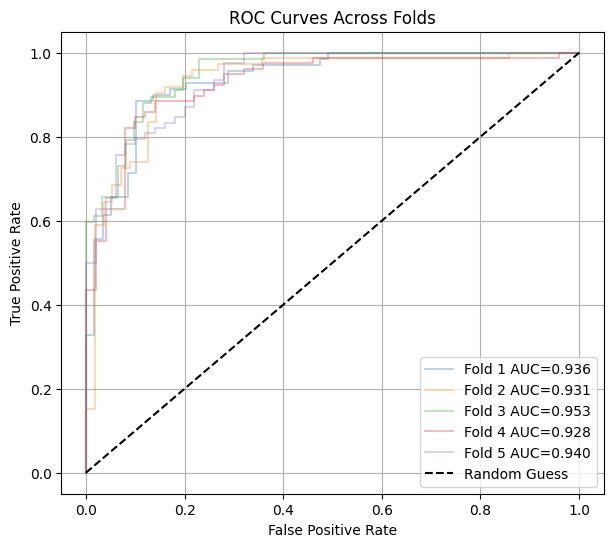

In [10444]:
results = run_logistic_kfold(X_UCL_key, Y_UCL_key, k=5)
